# COMP40731 Artificial Cognitive Systems
### Student name: Emmanuel Nana Kow Menyah-Artivor 
### Student Id: N1217372
### Group Id: ACS 12 
**Note:** Only if you worked in a group
### Group member id: 2
**Note:** Only if you worked in a group

### Markdown language support
Check [here](https://www.markdownguide.org/extended-syntax/) to find more details about markdown


### Add a diagram of your architecture

Simple SNN Diagram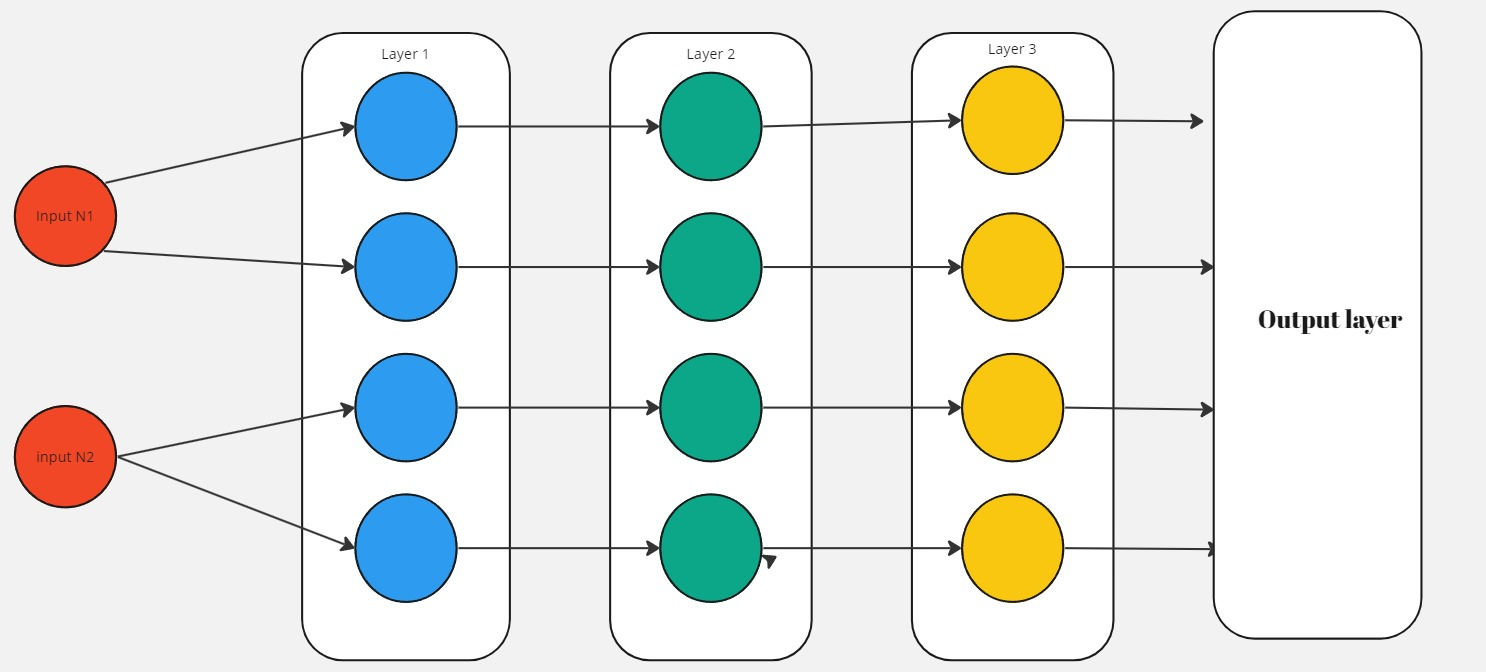


# Notes

### JSON for Configuration Flexibility: 
JSON files must be utilised to enable flexible configuration of SNN network parameters, storing crucial details such as layer sizes, learning rates, and hyperparameters.

### HDF5 Storage for Encoded Signal:  
Separate HDF5 files must be implemented to store the encoded signal before and after exposure to noise. The structure, datasets, and relevant metadata must be clearly documented.

### NPY Storage for SNN Weights: 
SNN weights must be stored in an NPY file, including weights for each network layer. Clear explanations and comments within the Jupyter Notebook regarding the organisation and structure of the NPY file are required.

### AI Ethics Integration: 
AI ethics by design principles must be integrated into the SNN implementation. Implement steps to identify and mitigate algorithmic biases. 

### Spiking Records and Multimeters Integration:

    Utilise spiking records and multimeters within the SNN architecture to record spike events and measure action potentials of decoding neurons.
    Use spike recorders, capturing temporal patterns and relevant information during the encoding, decoding, and learning processes.
    Use multimeters to measure the action potentials of decoding neurons, providing valuable insights into the dynamics and responsiveness of the network.
    Integrate visualisations or plots within the Jupyter Notebook to showcase the recorded spiking events and action potentials, aiding in a comprehensive analysis of the SNN's behaviour and performance.
    
### Intercalated Training and Testing with Synaptic Switching:

    Implement an intercalated training approach where supervised learning is used for a specified number of epochs, followed by testing using static synapses for a single epoch.
    During training epochs, utilise supervised learning to enhance the SNN's performance and optimise decoding capabilities.
    Implement a mechanism to switch synapses to a static configuration during testing, allowing for the assessment of the network's generalisation and stability.
    Periodically store the SNN weights before switching to static synapses to preserve the learned information and facilitate analysis.
    Document and discuss the impact of this intercalated training and testing approach on the SNN's performance, emphasising improvements achieved through supervised learning and the network's ability to generalise with static synapses.


# Phase 1- Video Reconstruction 

## Import section
Import all the libraies that you need

In [1]:
import cv2
import os
import matplotlib.pyplot as plt 
from pydub import AudioSegment
import h5py
from tqdm import tqdm
import numpy as np
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Nov 16 2023 09:28:21

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



# Image and Sound Loading and Splitting 

In [2]:

# File path for the original video
original_video_path = '/home/ntu-user/PycharmProjects/Assesment/Video /COMP40731_video.mp4'

# Directories to save frames and audio
frames_dir = 'Frames'
sound_dir = 'Sound'
os.makedirs(frames_dir, exist_ok=True)
os.makedirs(sound_dir, exist_ok=True)

# Open the original video capture
cap_orig = cv2.VideoCapture(original_video_path)

# Check if the original video capture is successfully opened
if not cap_orig.isOpened():
    print(f"Error: Unable to open the video at path {original_video_path}")
else:
    frame_number = 1
    while True:
        # Read frame from the original video
        ret_orig, frame_orig = cap_orig.read()
        if not ret_orig:
            break

        # Resize the frame to the target size for easier handling
        resized_frame = cv2.resize(frame_orig, (174, 200), interpolation=cv2.INTER_LINEAR)

        # Save the resized frame as an image using matplotlib to ensure RGB format
        frame_filename = os.path.join(frames_dir, f"frame{frame_number:04d}.jpg")
        plt.imsave(frame_filename, cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB))

        frame_number += 1

    # Release the video capture object
    cap_orig.release()

    print(f"Frames saved to: {frames_dir}")
    print(f"Number of frames processed: {frame_number - 1}")

    # Extract audio using pydub
    audio = AudioSegment.from_file(original_video_path)
    audio_filename = os.path.join(sound_dir, 'extracted_audio.wav')
    audio.export(audio_filename, format='wav')

    print(f"Audio saved to: {audio_filename}")


Frames saved to: Frames
Number of frames processed: 892
Audio saved to: Sound/extracted_audio.wav


# Image Encoding 

Reading image frame0001...
Image dimensions: Height: 174, Width: 200


Setting currents for Blue channel: 100%|█| 34800/34800 [00:25<00:00, 1390.73it/s
Setting currents for Green channel: 100%|█| 34800/34800 [00:24<00:00, 1398.09it/
Setting currents for Red channel: 100%|▉| 34730/34800 [00:23<00:00, 1469.23it/s]

Simulating for frame0001
Simulation completed for frame0001
Subtracting the propagation delay: 13.0 ms.


Setting currents for Red channel: 100%|██| 34800/34800 [04:55<00:00, 117.96it/s]


Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.


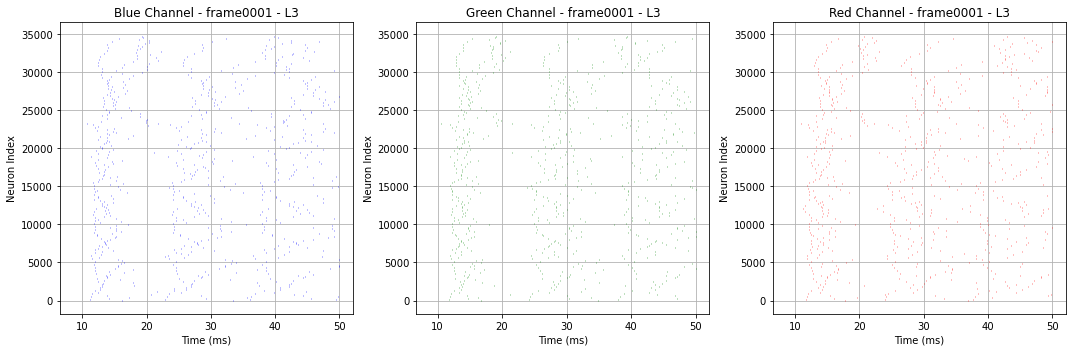

Setting currents for Red channel: 100%|█| 34800/34800 [00:33<00:00, 1028.58it/s]


Reading image frame0002...
Image dimensions: Height: 174, Width: 200


Setting currents for Blue channel: 100%|█| 34800/34800 [00:25<00:00, 1368.81it/s
Setting currents for Green channel: 100%|█| 34800/34800 [00:25<00:00, 1383.25it/
Setting currents for Red channel: 100%|▉| 34728/34800 [00:23<00:00, 1457.10it/s]

Simulating for frame0002
Simulation completed for frame0002
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.


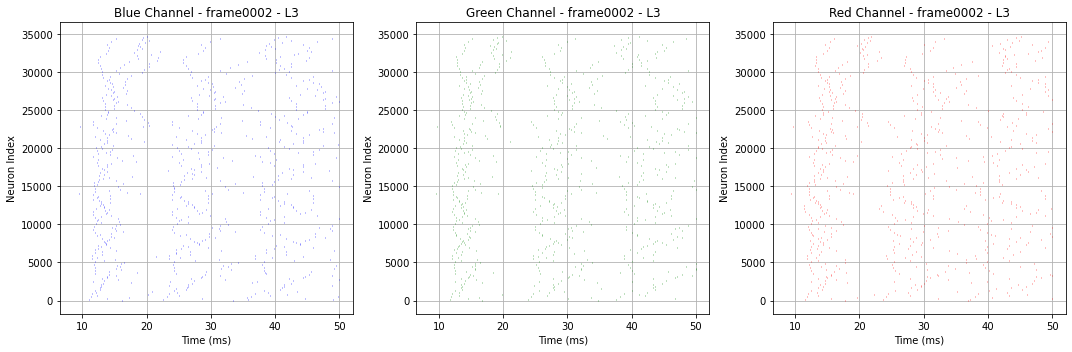

Setting currents for Red channel: 100%|█| 34800/34800 [00:34<00:00, 1014.86it/s]


Reading image frame0003...
Image dimensions: Height: 174, Width: 200


Setting currents for Blue channel: 100%|█| 34800/34800 [00:25<00:00, 1357.56it/s
Setting currents for Green channel: 100%|█| 34800/34800 [00:25<00:00, 1361.78it/
Setting currents for Red channel: 100%|▉| 34666/34800 [00:24<00:00, 1386.72it/s]

Simulating for frame0003
Simulation completed for frame0003
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.


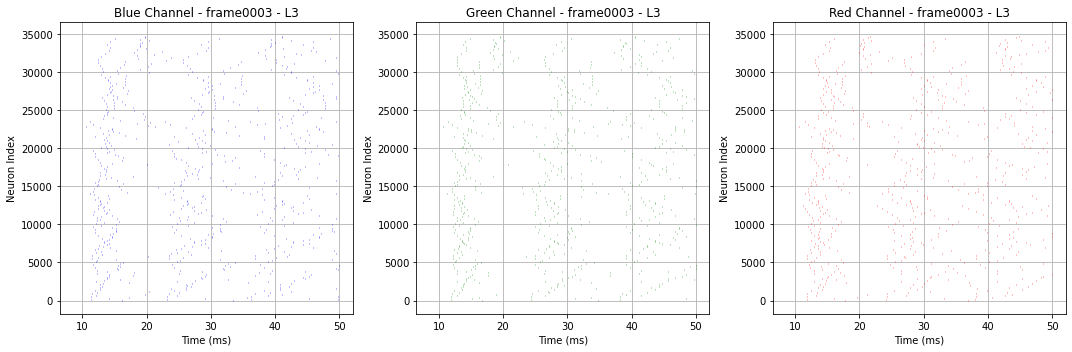

Setting currents for Red channel: 100%|██| 34800/34800 [00:35<00:00, 976.52it/s]


Reading image frame0004...
Image dimensions: Height: 174, Width: 200


Setting currents for Blue channel: 100%|█| 34800/34800 [00:25<00:00, 1369.54it/s
Setting currents for Green channel: 100%|█| 34800/34800 [00:25<00:00, 1383.74it/
Setting currents for Red channel: 100%|▉| 34678/34800 [00:24<00:00, 1430.77it/s]

Simulating for frame0004
Simulation completed for frame0004
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.


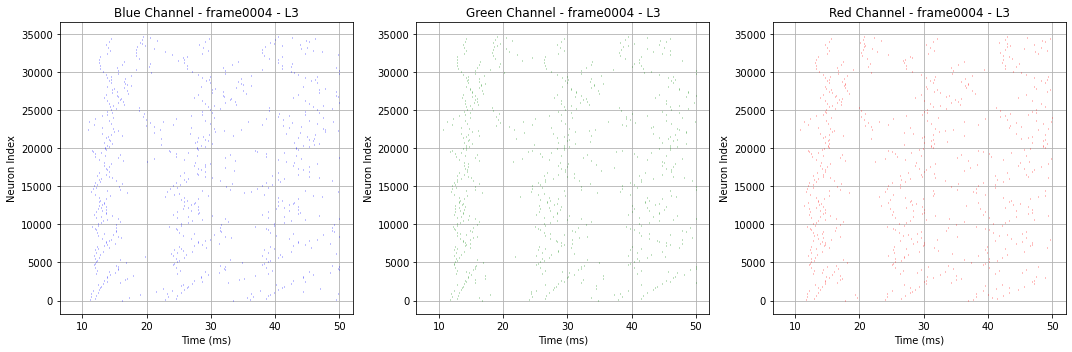

Setting currents for Red channel: 100%|██| 34800/34800 [00:35<00:00, 986.86it/s]


Reading image frame0005...
Image dimensions: Height: 174, Width: 200


Setting currents for Blue channel: 100%|█| 34800/34800 [00:25<00:00, 1367.93it/s
Setting currents for Green channel: 100%|█| 34800/34800 [00:25<00:00, 1379.48it/
Setting currents for Red channel: 100%|▉| 34771/34800 [00:24<00:00, 1392.27it/s]

Simulating for frame0005
Simulation completed for frame0005
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.


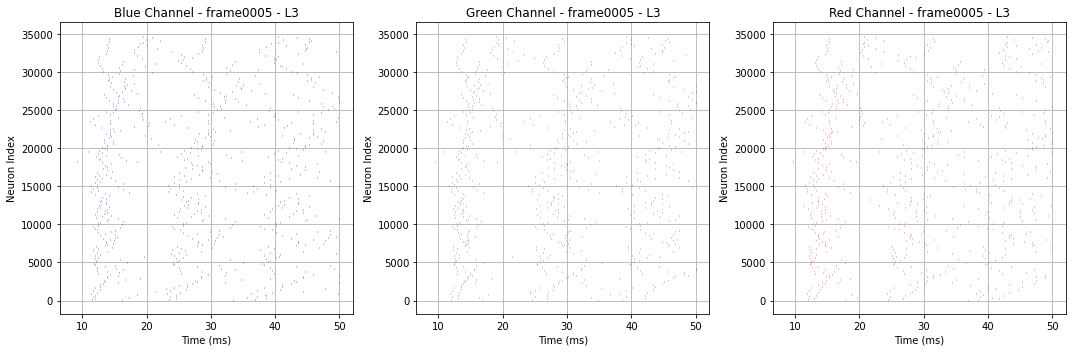

Setting currents for Red channel: 100%|██| 34800/34800 [00:35<00:00, 980.97it/s]


Reading image frame0006...
Image dimensions: Height: 174, Width: 200


Setting currents for Blue channel: 100%|█| 34800/34800 [00:25<00:00, 1364.43it/s
Setting currents for Green channel: 100%|█| 34800/34800 [00:25<00:00, 1377.93it/
Setting currents for Red channel: 100%|▉| 34661/34800 [00:24<00:00, 1437.16it/s]

Simulating for frame0006
Simulation completed for frame0006
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.


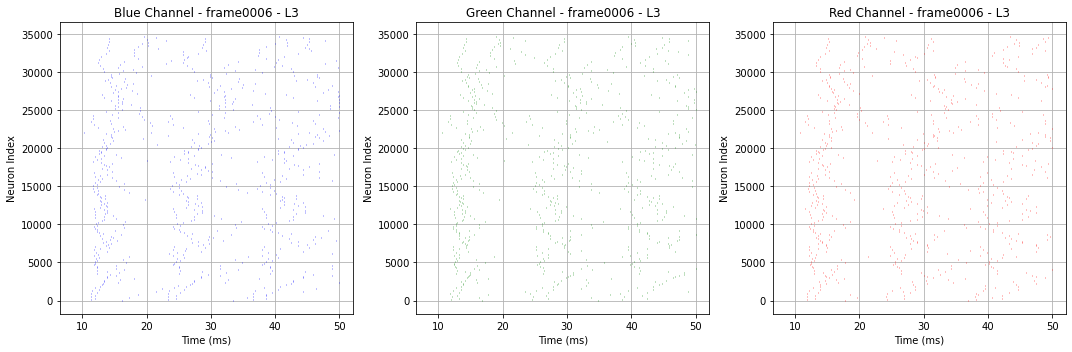

Setting currents for Red channel: 100%|██| 34800/34800 [00:35<00:00, 976.62it/s]


Reading image frame0007...
Image dimensions: Height: 174, Width: 200


Setting currents for Blue channel: 100%|█| 34800/34800 [00:25<00:00, 1363.57it/s
Setting currents for Green channel: 100%|█| 34800/34800 [00:24<00:00, 1394.52it/
Setting currents for Red channel: 100%|▉| 34788/34800 [00:24<00:00, 1436.50it/s]

Simulating for frame0007
Simulation completed for frame0007
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.


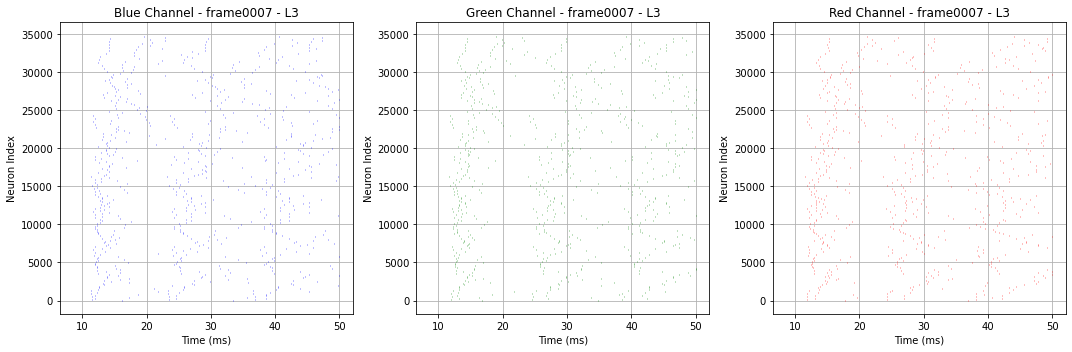

Setting currents for Red channel: 100%|██| 34800/34800 [00:35<00:00, 983.39it/s]


Reading image frame0008...
Image dimensions: Height: 174, Width: 200


Setting currents for Blue channel: 100%|█| 34800/34800 [00:25<00:00, 1355.27it/s
Setting currents for Green channel: 100%|█| 34800/34800 [00:25<00:00, 1366.36it/
Setting currents for Red channel: 100%|▉| 34689/34800 [00:24<00:00, 1407.04it/s]

Simulating for frame0008
Simulation completed for frame0008
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.


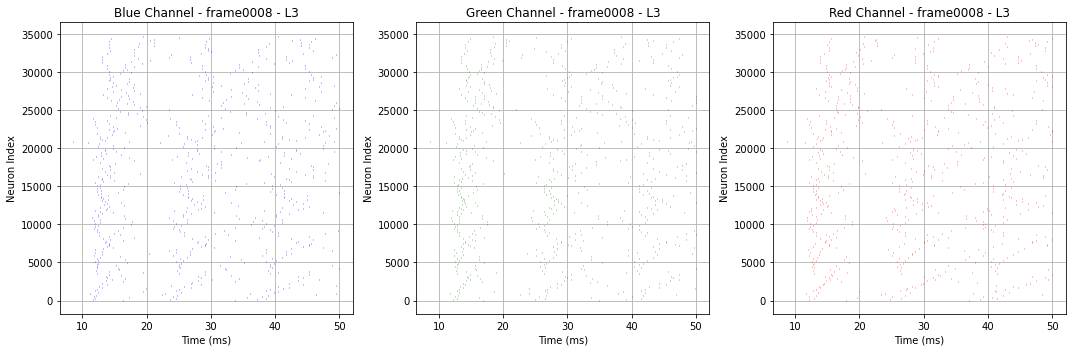

Setting currents for Red channel: 100%|██| 34800/34800 [00:35<00:00, 966.91it/s]


Reading image frame0009...
Image dimensions: Height: 174, Width: 200


Setting currents for Blue channel: 100%|█| 34800/34800 [00:25<00:00, 1357.81it/s
Setting currents for Green channel: 100%|█| 34800/34800 [00:25<00:00, 1380.06it/
Setting currents for Red channel: 100%|▉| 34655/34800 [00:23<00:00, 1455.08it/s]

Simulating for frame0009
Simulation completed for frame0009
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.


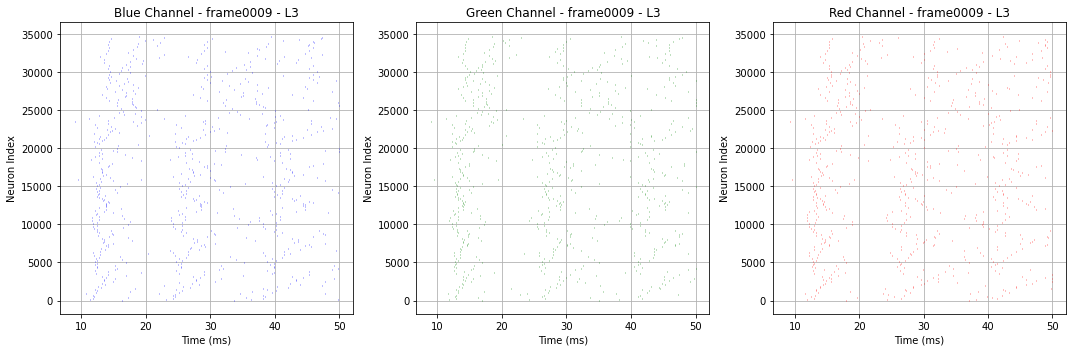

Setting currents for Red channel: 100%|██| 34800/34800 [00:35<00:00, 984.41it/s]


Reading image frame0010...
Image dimensions: Height: 174, Width: 200


Setting currents for Blue channel: 100%|█| 34800/34800 [00:25<00:00, 1374.22it/s
Setting currents for Green channel: 100%|█| 34800/34800 [00:25<00:00, 1378.43it/
Setting currents for Red channel: 100%|▉| 34667/34800 [00:24<00:00, 1434.33it/s]

Simulating for frame0010
Simulation completed for frame0010
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.
Subtracting the propagation delay: 13.0 ms.


Setting currents for Red channel: 100%|█| 34800/34800 [00:34<00:00, 1434.33it/s]

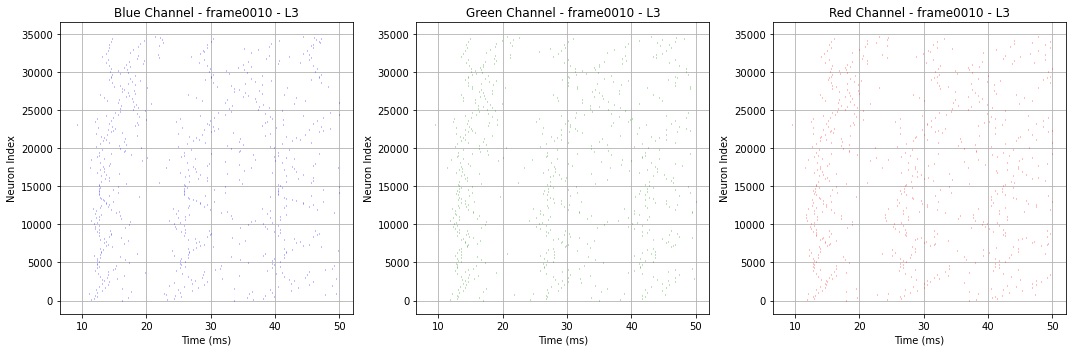

Setting currents for Red channel: 100%|██| 34800/34800 [00:35<00:00, 974.16it/s]


In [73]:
import cv2
import matplotlib.pyplot as plt
import nest
import numpy as np
import os
import h5py
from tqdm import tqdm

results_dir = "results/"
rows=174
cols=200

# Function to convert pixel intensity to current for each color channel
def pixel_intensity_to_current(intensity, offset=380):
    return intensity + offset

# Function to resize image
def resize_image(image, target_size=(cols, rows)):
    if target_size is None:
        return image
    else:
        return cv2.resize(image, target_size)

# Function to simulate raster plot for each image
def simulate_raster_plot(image_file, current_funcs, sim_time=50.0, pd=13.0):
    # Clear console
    os.system('clear')
    sim_time1=sim_time+pd
    # Read the image
    print("Reading image {}...".format(image_file))
    image = cv2.imread(os.path.join(images_folder, image_file + image_extension))
    # Resize the image
    resized_image = resize_image(image)
    # Get image dimensions
    height, width, _ = resized_image.shape
    print("Image dimensions: Height: {}, Width: {}".format(height, width))

    # Initialize NEST kernel
    nest.ResetKernel()
    nest.set_verbosity(20)  # Set NEST verbosity level to 20
    nest.SetKernelStatus({'print_time': False})

    # Create layers for Blue, Green, and Red channels
    layers_L1 = []
    layers_L2 = []
    layers_L3 = []
    spikerecorders_L1 = []
    spikerecorders_L2 = []
    spikerecorders_L3 = []
    for i, color in enumerate(['Blue','Green','Red']):
        # Create layer with iaf_psc_alpha neurons
        layers_L1.append(nest.Create('iaf_psc_alpha', width * height))
        layers_L2.append(nest.Create('iaf_psc_alpha', width * height))
        layers_L3.append(nest.Create('iaf_psc_alpha', width * height))
        # Connect each layer to a spike recorder
        spikerecorders_L1.append(nest.Create("spike_recorder"))
        spikerecorders_L2.append(nest.Create("spike_recorder"))
        spikerecorders_L3.append(nest.Create("spike_recorder"))

        # Progress bar for setting currents
        progress_bar = tqdm(total=height * width, desc="Setting currents for {} channel".format(color), position=0,
                            leave=True)

        # Create spike generators for each neuron and inject analog values
        for row in range(height):
            for col in range(width):
                # Calculate the current based on pixel intensity for the corresponding color channel
                intensity = resized_image[row, col, i]
                current = current_funcs[i](intensity)

                # Set current for each neuron
                neuron_index = row * width + col
                nest.SetStatus(layers_L1[i][neuron_index], {"I_e": current})
                nest.Connect(layers_L1[i][neuron_index], layers_L2[i][neuron_index], "one_to_one", syn_spec={"weight": 1200.0})
                nest.Connect(layers_L2[i][neuron_index], layers_L3[i][neuron_index], "one_to_one", syn_spec={"weight": 1200.0})

                # Update progress bar
                progress_bar.update(1)


        nest.Connect(layers_L1[i], spikerecorders_L1[i])
        nest.Connect(layers_L2[i], spikerecorders_L2[i])
        nest.Connect(layers_L3[i], spikerecorders_L3[i])

    # Simulate
    print("Simulating for", image_file)
    nest.Simulate(sim_time1)
    print("Simulation completed for", image_file)

    # Save spike events and senders in HDF5 format
    os.makedirs(results_dir, exist_ok=True)
    with h5py.File(os.path.join(results_dir, image_file + "_spikes.h5"), "w") as file:
        for i, color in enumerate(['Blue', 'Green','Red']):
            events = spikerecorders_L3[i].get("events")
            senders = events["senders"]
            times = events["times"]
            grp = file.create_group(color)
            grp.create_dataset("senders", data=senders)
            grp.create_dataset("times", data=times)
            grp.attrs["image_filename"] = image_file
            grp.attrs["image_dimensions"] = (height, width)
            grp.attrs["simulation_time"] = sim_time

    # Plot raster plot for each color channel
    plt.figure(figsize=(15, 5))
    for i, color in enumerate(['Blue', 'Green','Red']):
        plt.subplot(1, 3, i + 1)
        plt.title('{} Channel - {} - L3'.format(color, image_file))
        plt.xlabel('Time (ms)')
        plt.ylabel('Neuron Index')
        plt.grid()
        ts = spikerecorders_L3[i].get("events")["times"]
        if(np.min(ts)>pd):
            print("Subtracting the propagation delay:",pd,"ms.")
            ts=ts-pd

        senders = spikerecorders_L3[i].get("events")["senders"]-np.min(spikerecorders_L3[i].get("events")["senders"])  # normalise values between 0 and cols*rows-1
        # print(np.min(senders),np.max(senders),(cols*rows))
        np.save(os.path.join(results_dir, image_file + "_"+ color + "_L3_senders.npy"), senders)
        np.save(os.path.join(results_dir, image_file + "_"+ color + "_L3_ts.npy"), ts)
        plt.vlines(ts, senders, senders + 1, color=color.lower(), linewidths=0.5)
    plt.tight_layout()
    plt.show()


# List of image file names
images_folder = 'Frames/'
image_extension = '.jpg'
# Start and end frames
start_frame = 1
end_frame = 10

#Load Json 
with open('model.json') as f: 
    params = json.load(f)
    model = params['model']

# List of image files within the range of start_frame and end_frame
image_files = [f'frame{i:04d}' for i in range(start_frame, end_frame + 1)]

# Simulate raster plot for each image
for image_file in image_files:
    simulate_raster_plot(image_file, [pixel_intensity_to_current] * 3)


# Normalized 3D Matrix - Image Normalization

In [84]:
def create_normalised_3D_matrix(fig, times_red, senders_red, times_green, senders_green, times_blue, senders_blue, cols):
    rows = 174 * 200
    normalised_3Dmat = np.zeros((rows, cols, 3))
    for i in range(len(times_red)):
        normalised_3Dmat[int(senders_red[i] - 1), int(np.round(times_red[i], 0)), 0] = 1.0  # red
    for i in range(len(times_green)):
        normalised_3Dmat[int(senders_green[i] - 1), int(np.round(times_green[i], 0)), 1] = 1.0  # green
    for i in range(len(times_blue)):
        normalised_3Dmat[int(senders_blue[i] - 1), int(np.round(times_blue[i], 0)), 2] = 1.0  # blue
    np.save(f"results/normalised_3Dmat_{fig}.npy", normalised_3Dmat)  # Use np.save to save the array
    return normalised_3Dmat.astype(bool)


In [85]:
def plot_results(fig, normalised_3Dmat, cols):
    """
    Plot the raster plot.
    Parameters:
        fig (str): Figure name.
        normalised_3Dmat (numpy.ndarray): Normalised 3D matrix of spike events.
        cols (int): Number of time bins.
    """
    # Print size
    print(f"normalised_3Dmat: {np.round((normalised_3Dmat.nbytes) / (1024 * 1024), 2)} MB")
    print()
        # Plot the raster plot
    plt.figure(figsize=(10, 6))
    for channel, color in enumerate(['red', 'green', 'blue']):
        print(f"Preparing plot for {color} ...")
        for idx in range(normalised_3Dmat.shape[0]):
            spike_times = np.where(normalised_3Dmat[idx, :, channel])[0] * (cols // 3)  # Adjust the indexing
            if len(spike_times) > 0:
                plt.vlines(spike_times, idx, idx + 1, color=color, linewidth=1)
    print("Done!")
    plt.xlabel('Time [ms]')
    plt.ylabel('Neuron Index')
    plt.title(f"Raster Plot of {fig}")
    plt.ylim(0, normalised_3Dmat.shape[0])
    plt.grid(True)
    plt.savefig(f"results/{fig}_3D_raster_plot.png")
    plt.show()


In [86]:
# List of figure names
figures = [f'frame{i+1:04d}' for i in range (0,10)]

In [87]:
# List colour names
colours = ["Red","Green","Blue"]
cols=51 # time in ms

Processing frame0001 ...
normalised_3Dmat: 5.08 MB

Preparing plot for red ...
Preparing plot for green ...
Preparing plot for blue ...
Done!


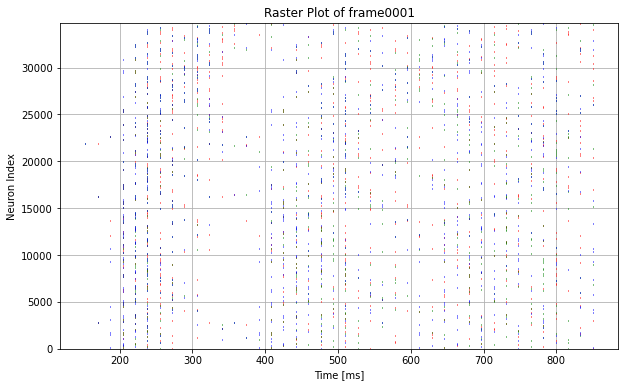

Processing frame0002 ...
normalised_3Dmat: 5.08 MB

Preparing plot for red ...
Preparing plot for green ...
Preparing plot for blue ...
Done!


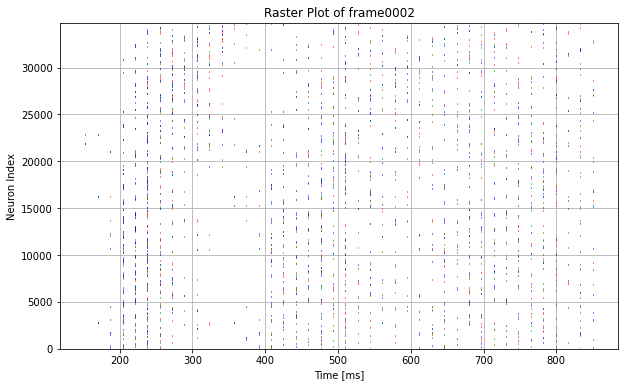

Processing frame0003 ...
normalised_3Dmat: 5.08 MB

Preparing plot for red ...
Preparing plot for green ...
Preparing plot for blue ...
Done!


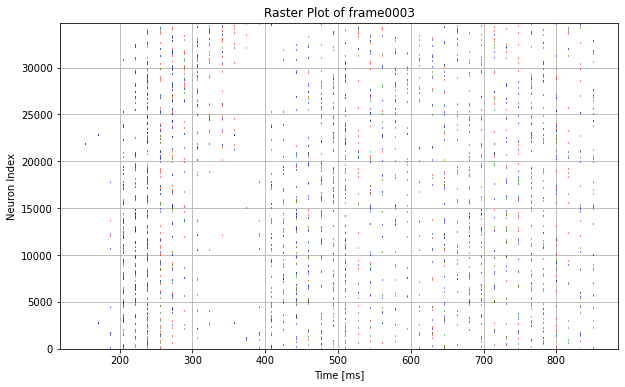

Processing frame0004 ...
normalised_3Dmat: 5.08 MB

Preparing plot for red ...
Preparing plot for green ...
Preparing plot for blue ...
Done!


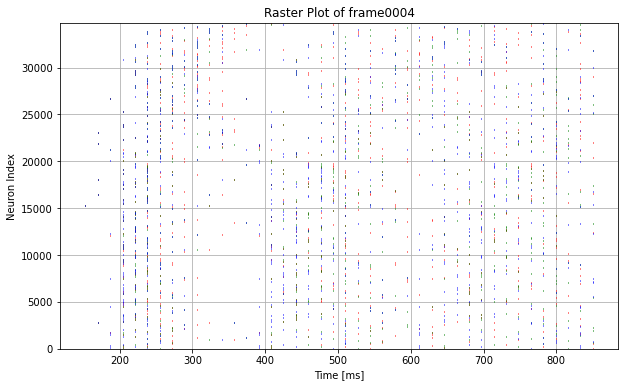

Processing frame0005 ...
normalised_3Dmat: 5.08 MB

Preparing plot for red ...
Preparing plot for green ...
Preparing plot for blue ...
Done!


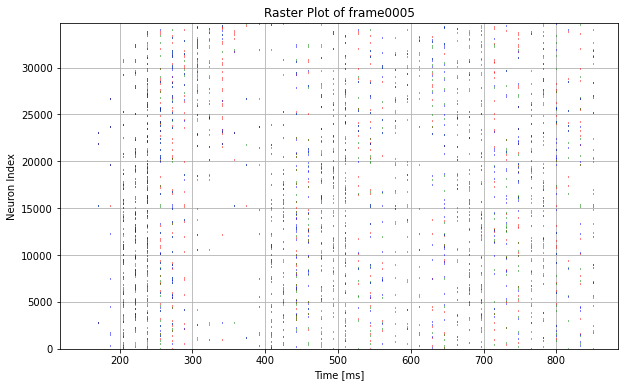

Processing frame0006 ...
normalised_3Dmat: 5.08 MB

Preparing plot for red ...
Preparing plot for green ...
Preparing plot for blue ...
Done!


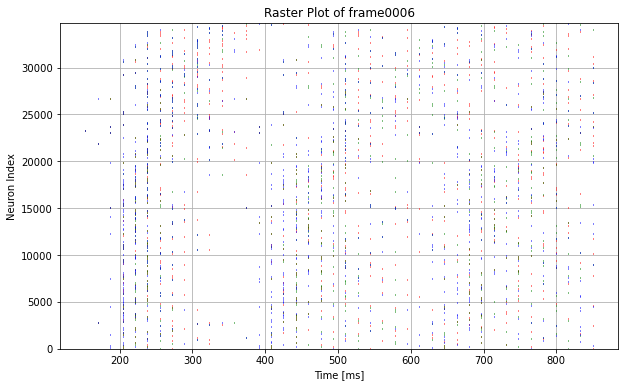

Processing frame0007 ...
normalised_3Dmat: 5.08 MB

Preparing plot for red ...
Preparing plot for green ...
Preparing plot for blue ...
Done!


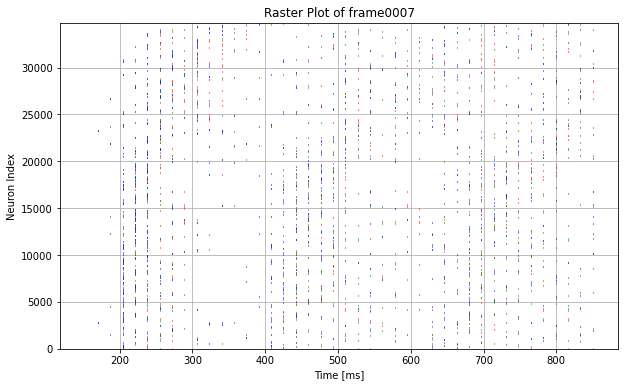

Processing frame0008 ...
normalised_3Dmat: 5.08 MB

Preparing plot for red ...
Preparing plot for green ...
Preparing plot for blue ...
Done!


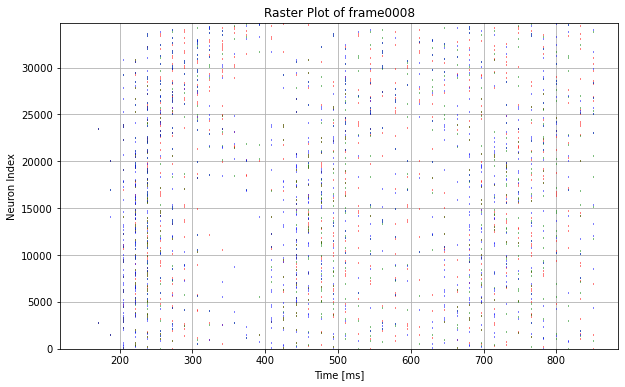

Processing frame0009 ...
normalised_3Dmat: 5.08 MB

Preparing plot for red ...
Preparing plot for green ...
Preparing plot for blue ...
Done!


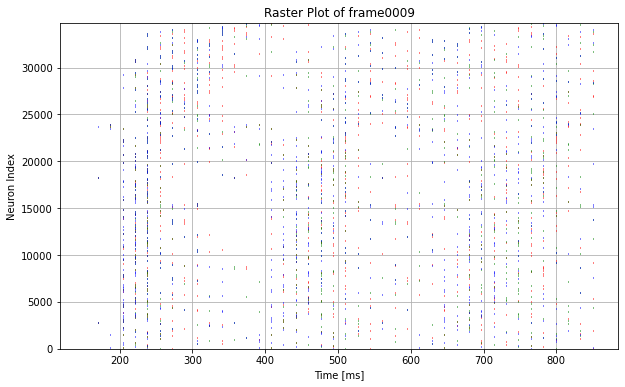

Processing frame0010 ...
normalised_3Dmat: 5.08 MB

Preparing plot for red ...
Preparing plot for green ...
Preparing plot for blue ...
Done!


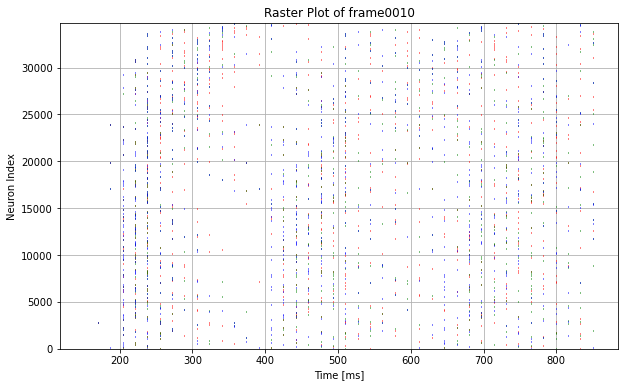

In [88]:
for idx in range(0,len(figures)):
    # Read events and senders from files
    print(f"Processing {figures[idx]} ...")
    times_red = np.load(f"results/{figures[idx]}_Red_L3_ts.npy", allow_pickle=True)
    senders_red = np.load(f"results/{figures[idx]}_Red_L3_senders.npy", allow_pickle=True)
    times_green = np.load(f"results/{figures[idx]}_Green_L3_ts.npy", allow_pickle=True)
    senders_green = np.load(f"results/{figures[idx]}_Green_L3_senders.npy", allow_pickle=True)
    times_blue = np.load(f"results/{figures[idx]}_Blue_L3_ts.npy", allow_pickle=True)
    senders_blue = np.load(f"results/{figures[idx]}_Blue_L3_senders.npy", allow_pickle=True)

    # Create the normalized 2D matrix
    normalised_3Dmat = create_normalised_3D_matrix(figures[idx],times_red, senders_red, times_green, senders_green, times_blue, senders_blue, cols)

    # Print results and plot raster plot
    plot_results(figures[idx], normalised_3Dmat,cols)

# 2D Matrix - Image Reconstruction 

In [51]:
import cv2
import os
import matplotlib.pyplot as plt 
from pydub import AudioSegment
import h5py
from tqdm import tqdm
import numpy as np
import nest

In [52]:
rows=174 #240
cols=200 #320

directory = 'npy_results'
if not os.path.exists(directory):
    os.makedirs(directory)

In [53]:
def create_normalised_2D_matrix(times, senders, cols):
    rows = np.max(senders) + 1
    normalised_2Dmat = np.zeros((rows, cols))
    for i in range(len(times)):
        normalised_2Dmat[int(senders[i]), int(np.round(times[i], 0))] = 1.0
        normalised_2Dmat.dump(f"npy_results/normalised_2Dmat.npy")


    # Save the matrix as .npy file
    file_path = os.path.join(directory, "normalised_2Dmat.npy")
    np.save(file_path, normalised_2Dmat)
    return normalised_2Dmat.astype(bool)

In [54]:
def find_spike_pattern(pattern, normalised_2Dmat):
    for idx in range(normalised_2Dmat.shape[0]):
        if np.array_equal(normalised_2Dmat[idx], pattern):
            return idx
    return -1

Loading normalised 2D matrix...
Normalised 2D matrix loaded.
Processing frame0001 ...
(34800, 51, 3)
2D matrix created.
Loading original image...
Original image loaded.
Calculating absolute difference...
Absolute difference calculated.
Reconstructed image saved at: reconstructed_images/frame0001_reconstructed.jpg
Plotting and saving results...


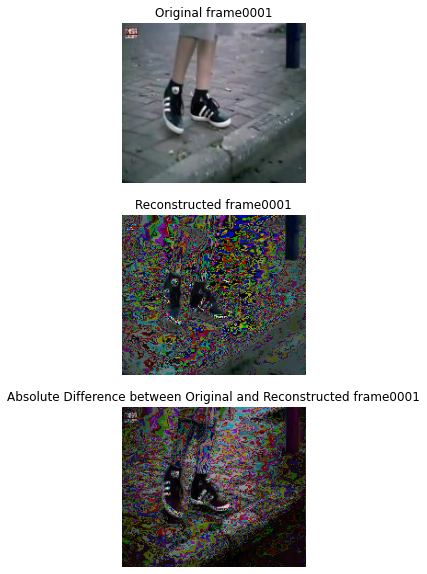

Results plotted and saved.
Processing frame0002 ...
(34800, 51, 3)
2D matrix created.
Loading original image...
Original image loaded.
Calculating absolute difference...
Absolute difference calculated.
Reconstructed image saved at: reconstructed_images/frame0002_reconstructed.jpg
Plotting and saving results...


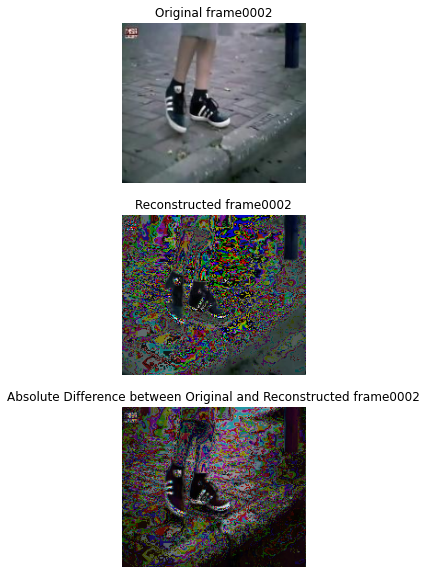

Results plotted and saved.
Processing frame0003 ...
(34800, 51, 3)
2D matrix created.
Loading original image...
Original image loaded.
Calculating absolute difference...
Absolute difference calculated.
Reconstructed image saved at: reconstructed_images/frame0003_reconstructed.jpg
Plotting and saving results...


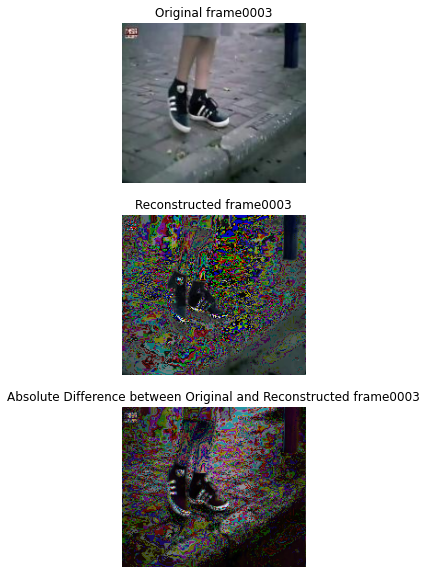

Results plotted and saved.
Processing frame0004 ...
(34800, 51, 3)
2D matrix created.
Loading original image...
Original image loaded.
Calculating absolute difference...
Absolute difference calculated.
Reconstructed image saved at: reconstructed_images/frame0004_reconstructed.jpg
Plotting and saving results...


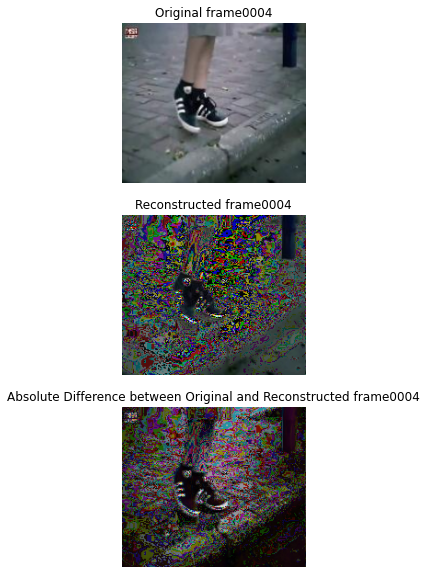

Results plotted and saved.
Processing frame0005 ...
(34800, 51, 3)
2D matrix created.
Loading original image...
Original image loaded.
Calculating absolute difference...
Absolute difference calculated.
Reconstructed image saved at: reconstructed_images/frame0005_reconstructed.jpg
Plotting and saving results...


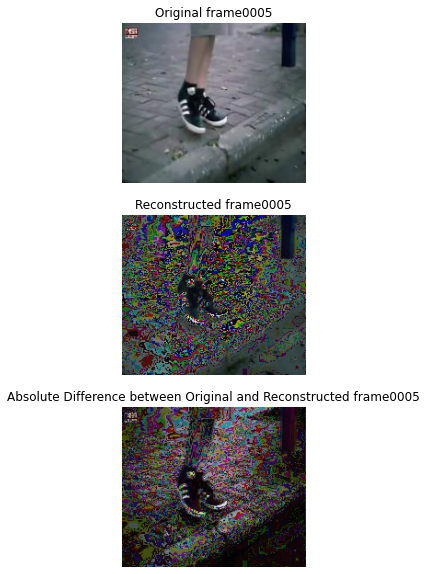

Results plotted and saved.
Processing frame0006 ...
(34800, 51, 3)
2D matrix created.
Loading original image...
Original image loaded.
Calculating absolute difference...
Absolute difference calculated.
Reconstructed image saved at: reconstructed_images/frame0006_reconstructed.jpg
Plotting and saving results...


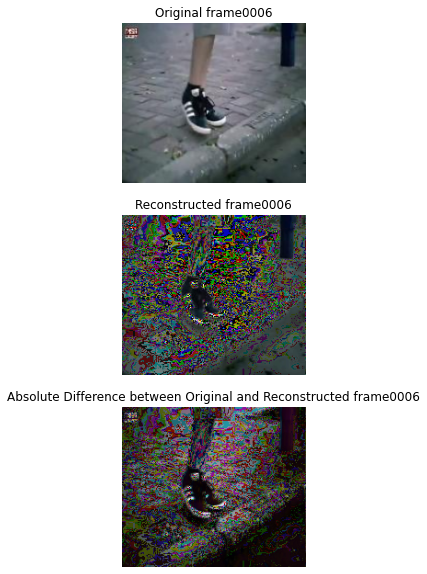

Results plotted and saved.
Processing frame0007 ...
(34800, 51, 3)
2D matrix created.
Loading original image...
Original image loaded.
Calculating absolute difference...
Absolute difference calculated.
Reconstructed image saved at: reconstructed_images/frame0007_reconstructed.jpg
Plotting and saving results...


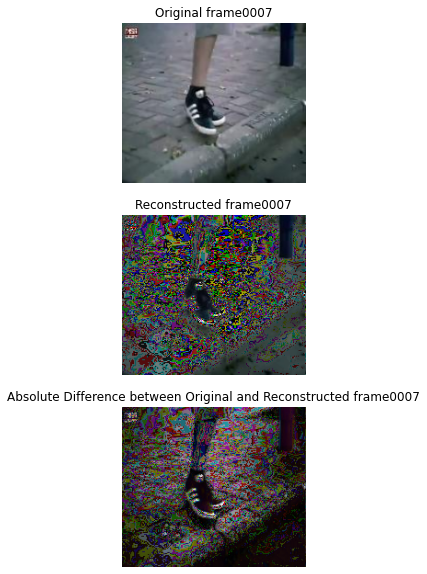

Results plotted and saved.
Processing frame0008 ...
(34800, 51, 3)
2D matrix created.
Loading original image...
Original image loaded.
Calculating absolute difference...
Absolute difference calculated.
Reconstructed image saved at: reconstructed_images/frame0008_reconstructed.jpg
Plotting and saving results...


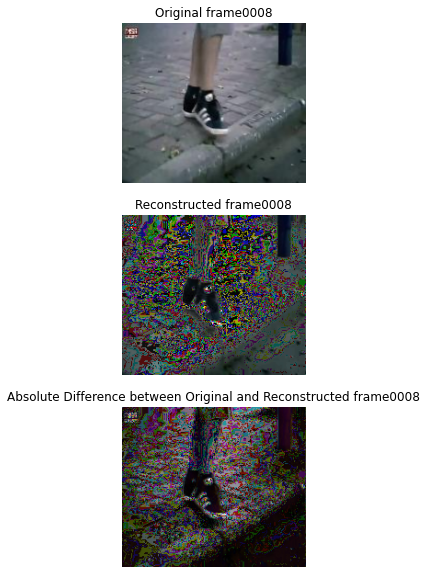

Results plotted and saved.
Processing frame0009 ...
(34800, 51, 3)
2D matrix created.
Loading original image...
Original image loaded.
Calculating absolute difference...
Absolute difference calculated.
Reconstructed image saved at: reconstructed_images/frame0009_reconstructed.jpg
Plotting and saving results...


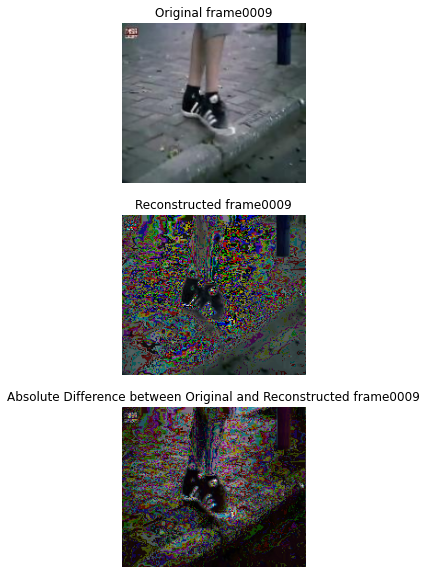

Results plotted and saved.
Processing frame0010 ...
(34800, 51, 3)
2D matrix created.
Loading original image...
Original image loaded.
Calculating absolute difference...
Absolute difference calculated.
Reconstructed image saved at: reconstructed_images/frame0010_reconstructed.jpg
Plotting and saving results...


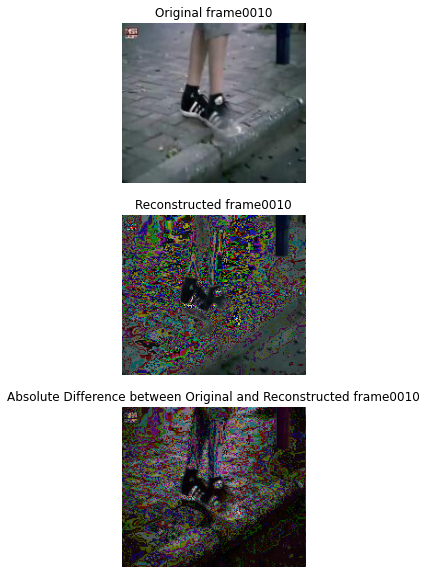

Results plotted and saved.
All processing completed.


In [55]:
def spikes_to_analog(pattern, normalised_2Dmat):
    min_distance = np.inf
    best_match_idx = -1
    for idx in range(normalised_2Dmat.shape[0]):
        distance = np.linalg.norm(pattern -normalised_2Dmat[idx])
        if distance < min_distance:
            min_distance = distance
            best_match_idx = idx
    return best_match_idx

#Reset NEST kernel
nest.ResetKernel()

# Define the number of neurons
num_neurons = 256
offset = 380

# Create layer with iaf_psc_alpha neurons
layers_L1 = nest.Create('iaf_psc_alpha', num_neurons)
layers_L2 = nest.Create('iaf_psc_alpha', num_neurons)
layers_L3 = nest.Create('iaf_psc_alpha', num_neurons)

spikerecorders_L1 = nest.Create("spike_recorder")
spikerecorders_L2 = nest.Create("spike_recorder")
spikerecorders_L3 = nest.Create("spike_recorder")

# Define the analog values from 0 to 255
min_analog_value = 0 + offset
max_analog_value = 255 + offset

ind = 0

for value in range(min_analog_value, max_analog_value):
    nest.SetStatus(layers_L1[ind], {"I_e": value})
    nest.SetStatus(layers_L2[ind], {"I_e": value})
    nest.SetStatus(layers_L3[ind], {"I_e": value})
    ind += 1

nest.Connect(layers_L1, spikerecorders_L1)
nest.Connect(layers_L2, spikerecorders_L2)
nest.Connect(layers_L3, spikerecorders_L3)

# Simulate
nest.Simulate(50.0)

# Get spike times
events_L1 = spikerecorders_L1.get("events")
senders_L1 = events_L1["senders"]
ts_L1 = events_L1["times"]

events_L2 = spikerecorders_L2.get("events")
senders_L2 = events_L2["senders"]
ts_L2 = events_L2["times"]

events_L3 = spikerecorders_L3.get("events")
senders_L3 = events_L3["senders"]
ts_L3 = events_L3["times"]

normalised_2Dmat = create_normalised_2D_matrix(ts_L3, senders_L3, 51)

# Load the normalised 2D matrix
print("Loading normalised 2D matrix...")
file_path = os.path.join(directory, "normalised_2Dmat.npy")
if os.path.exists(file_path):
    normalised_2Dmat = np.load(file_path, allow_pickle=True)
    print("Normalised 2D matrix loaded.")
else:
    print(f"Error: The file '{file_path}' does not exist.")
    exit()

# List of figure names
figures = [f'frame{i:04d}' for i in range(1, 11)]

# Create directory for reconstructed images
reconstructed_dir = "reconstructed_images"
os.makedirs(reconstructed_dir, exist_ok=True)

for idx, fig in enumerate(figures):
    # Read events and senders from files
    print(f"Processing {fig} ...")
    file_path = f"results/normalised_3Dmat_{fig}.npy"
    if os.path.exists(file_path):
        normalised_3Dmat = np.load(file_path, allow_pickle=True)
        print(normalised_3Dmat.shape)
    else:
        print(f"Error: The file '{file_path}' does not exist.")
        continue

    # Create 2D matrix for each channel
    analogue_values_ch = np.zeros((174, 200, 3), dtype=np.uint8)
    for k in range(normalised_3Dmat.shape[2]):  # Iterate over the third dimension
        for i in range(normalised_3Dmat.shape[0]):
            tmp = spikes_to_analog(normalised_3Dmat[i, :, k], normalised_2Dmat)
            if tmp < 0:
                raise ValueError("Invalid value!")
            r, c = divmod(i, 200)  # Calculate row and column indices
            analogue_values_ch[r, c, k] = np.array(tmp).astype(np.uint8)

    print("2D matrix created.")

    # Load original image
    print("Loading original image...")
    file_path = f"Frames/{fig}.jpg"
    if os.path.exists(file_path):
        original_image = cv2.imread(file_path)
        original_image_resized = cv2.resize(original_image, (200, 174))
        print("Original image loaded.")
    else:
        print(f"Error: The file '{file_path}' does not exist.")
        continue

    # Calculate the absolute difference between original and reconstructed images
    print("Calculating absolute difference...")
    diff_image = cv2.absdiff(original_image_resized, analogue_values_ch)
    print("Absolute difference calculated.")

    # Save reconstructed image
    reconstructed_image_path = os.path.join(reconstructed_dir, f"{fig}_reconstructed.jpg")
    cv2.imwrite(reconstructed_image_path, cv2.cvtColor(analogue_values_ch, cv2.COLOR_RGB2BGR))
    print(f"Reconstructed image saved at: {reconstructed_image_path}")
    
      # Save and display the plot
    print("Plotting and saving results...")
    plt.figure(figsize=(10, 10))

    # Plot the original image
    plt.subplot(3, 1, 1)
    plt.imshow(cv2.cvtColor(original_image_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"Original {fig}")
    plt.axis('off')

    # Plot the reconstructed image
    plt.subplot(3, 1, 2)
    plt.imshow(analogue_values_ch)
    plt.title(f"Reconstructed {fig}")
    plt.axis('off')

    # Plot the absolute difference image
    plt.subplot(3, 1, 3)
    plt.imshow(cv2.cvtColor(diff_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Absolute Difference between Original and Reconstructed {fig}")
    plt.axis('off')

    # Save the plot
    save_dir = os.path.join("results", "comparison")
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(os.path.join(save_dir, f"{fig}_comparison.png"))
    plt.show()
    print("Results plotted and saved.")

print("All processing completed.")


# Sound Data Collection

In [4]:
from scipy.io import wavfile
import os
import numpy as np 
import matplotlib.pyplot as plt 

Sound Information:
Number of samples: 1311744
Length (seconds): 29.744761904761905
Minimum value: -9951
Maximum value: 9898


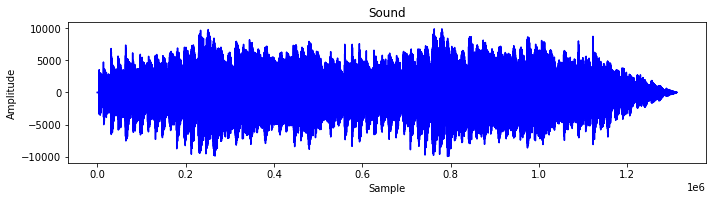

In [5]:
sound_dir = 'sound_results'
os.makedirs(sound_dir, exist_ok=True)
# Function to display sound file information
def display_info(data, rate):
    num_samples = len(data)
    length = len(data) / rate
    min_val = np.min(data)
    max_val = np.max(data)
    print("Number of samples:", num_samples)
    print("Length (seconds):", length)
    print("Minimum value:", min_val)
    print("Maximum value:", max_val)

# Read the WAV files
rate1, data1 = wavfile.read('/home/ntu-user/PycharmProjects/Assesment/Sound/extracted_audio.wav')

# Display information about each sound file
print("Sound Information:")
display_info(data1, rate1)

# Plot the data
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(data1, color='blue')  # Plot data1 in blue
plt.title('Sound')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Store the data in npy files
np.save('sound_results/data1.npy', data1)
np.save('sound_results/rate1.npy', rate1)


# Sound Encoding

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import nest
import time as tm

For 379 the number of spikes is 1
For 414 the number of spikes is 2
For 480 the number of spikes is 3
For 504 the number of spikes is 4
For 505 the number of spikes is 5
For 506 the number of spikes is 6
For 507 the number of spikes is 7
For 508 the number of spikes is 8
For 509 the number of spikes is 11
result: [[378, 0], [379, 1], [414, 2], [480, 3], [504, 4], [505, 5], [506, 6], [507, 7], [508, 8], [509, 11]]


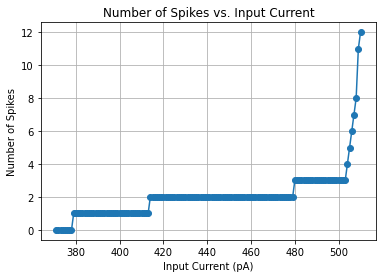

In [9]:
# Reset the NEST kernel
nest.ResetKernel()
nest.set_verbosity(20)  # Set NEST verbosity level to 20

# Create a spike recorder
spike_recorder = nest.Create('spike_recorder')

# Initialize variables and lists
currents = []  # List to store input currents
spike_counts = []  # List to store spike counts
min_current = 0  # Variable to store the minimum current
inc = 1  # Increment value for increasing the current
current = 370  # Initial current value
num_spikes = 0  # Variable to store the number of spikes

neuron_params = {
    'C_m': 250.0,  # Membrane capacitance (pF)
    'tau_m': 10.0,  # Membrane time constant (ms)
    't_ref': 2.0,  # Refractory period (ms)
    'E_L': 0.0,  # Resting membrane potential (mV)
    'V_th': 20.0,  # Threshold potential (mV)
    'V_reset': 10.0,  # Reset potential (mV)
    'tau_syn_ex': 0.5,  # Excitatory synaptic time constant (ms)
    'tau_syn_in': 0.5  # Inhibitory synaptic time constant (ms)

}

# Create a single neuron with the IAF_PSC_ALPHA model
neuron = nest.Create('iaf_psc_alpha')

# List to store current and spike count pairs where the number of spikes increased
current_spikes_values = [[0, 0]]
current_spikes_idx = 0  # Index for current_spikes_values list
actual_number_spikes = 0  # Actual number of spikes observed
number_spikes = 0  # Number of spikes observed

# Connect the neuron to the spike recorder
nest.Connect(neuron, spike_recorder)

# Loop through the input currents from 200 to 500 in increments of 10
while current < 800 and num_spikes < 12:
    nest.SetStatus(neuron, neuron_params)
    nest.SetStatus(spike_recorder, {'n_events': 0})
    neuron = nest.Create('iaf_psc_alpha')

    # Connect the neuron to the spike recorder
    nest.Connect(neuron, spike_recorder)

    # Set the input current to the neuron
    nest.SetStatus(neuron, {'I_e': current})
    current += inc  # Increment the current

    # Simulate for 50 ms
    nest.Simulate(50.0)

    # Get the number of spikes recorded by the spike recorder
    num_spikes = nest.GetStatus(spike_recorder, 'n_events')[0]

    # Store the current and spike count
    currents.append(current)
    spike_counts.append(num_spikes)

    # Record the current and spike count if the number of spikes increased
    if num_spikes == 0 and current > min_current:
        min_current = current
        current_spikes_values[0][0] = current
        number_spikes = 0
        current_spikes_idx = 1
    if num_spikes > 0:
        if num_spikes > actual_number_spikes:
            if len(current_spikes_values) < 10:
                current_spikes_values.append([current, num_spikes])
                actual_number_spikes = num_spikes
                print("For", current, "the number of spikes is", num_spikes)
            else:
                break

# Print the result
print("result:", current_spikes_values)

# Save the current_spikes_values as npy file
np.save('sound_results/current_spikes_values.npy', current_spikes_values)

# Plot the number of spikes for different increments
plt.plot(currents, spike_counts, marker='o')
plt.title('Number of Spikes vs. Input Current')
plt.xlabel('Input Current (pA)')
plt.ylabel('Number of Spikes')
plt.grid(True)
plt.show()


In [10]:
# Function to chunk data into chunks of specified duration
def chunk_data(data, rate, duration_sec):
    chunk_size = int(rate * duration_sec)
    num_chunks = len(data) // chunk_size
    chunks = [data[i * chunk_size: (i + 1) * chunk_size] for i in range(num_chunks)]
    return chunks

In [11]:
# Function to plot data
def plot_data(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()


In [12]:
# Function to plot raster plot
def raster_plot(raster_data, chunk_idx, num_total_neurons):
    plt.figure(figsize=(10, 5))
    plt.eventplot(raster_data, colors='black')
    plt.title(f'Raster Plot for Chunk {chunk_idx + 1}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.xlim(0, 50)  # Limit x-axis to 50 ms
    plt.ylim(0, num_total_neurons)
    plt.show()

In [13]:
def get_current_for_idx(idx):
    # Load the current_spikes_values from npy file
    current_spikes_values = np.load('sound_results/current_spikes_values.npy')

    # Check if the index is within the valid range
    if 0 <= idx < len(current_spikes_values):
        return current_spikes_values[idx][0]
    else:
        raise ValueError("Index out of range")


In [14]:
# Function to get currents for a given value
def get_currents_for_value(value):
    # Create an array to store currents for each neuron
    currents = np.zeros(6)

    # Normalize the value to be within the range of -99999 to 99999
    value = max(-99999, min(value, 99999))

    # Compute currents for each neuron
    if value >= 0:
        currents[5] = get_current_for_idx(0)  # Neuron 5: No spike for positive values
    else:
        currents[5] = get_current_for_idx(1)  # Neuron 5: Activate negative spike neuron
    currents[0] = get_current_for_idx(value % 10)  # Neuron 0: Increment of 1
    currents[1] = get_current_for_idx((value // 10) % 10)  # Neuron 1: Increment of 10
    currents[2] = get_current_for_idx((value // 100) % 10)  # Neuron 2: Increment of 100
    currents[3] = get_current_for_idx((value // 1000) % 10)  # Neuron 3: Increment of 1000
    currents[4] = get_current_for_idx((value // 10000) % 10)  # Neuron 4: Increment of 10000
    return currents


In [15]:
# Function to simulate SNN and plot image_encoding_results
def simulate_snn(chunks, num_total_neurons, data_num):
    nest.ResetKernel()
    nest.set_verbosity(20)  # Set NEST verbosity level to 20
    nest.SetKernelStatus({'print_time': False})
    neuron_model = 'iaf_psc_alpha'
    pop_left = nest.Create(neuron_model, num_total_neurons, params=neuron_params)
    pop_right = nest.Create(neuron_model, num_total_neurons, params=neuron_params)
    spike_detector_left = nest.Create('spike_recorder')
    spike_detector_right = nest.Create('spike_recorder')

    nest.Connect(pop_left, spike_detector_left)
    nest.Connect(pop_right, spike_detector_right)

    num_chunks = len(chunks)
    total_time = 0
    for chunk_idx, chunk in enumerate(chunks):
        print("Simulating chunk", (chunk_idx + 1), "of", num_chunks, "...")
        start_time = tm.time()  # Use the imported time module alias
        neuron_idx = 0

        # Reset neuron parameters and spike recorder
        nest.SetStatus(pop_left, neuron_params)
        nest.SetStatus(pop_right, neuron_params)

        for sample in chunk:
            # Convert amplitude to current and scale to suitable range
            currents_left = get_currents_for_value(sample[0])
            currents_right = get_currents_for_value(sample[1])

            # Set the current to 6 neurons of the left channel
            for i in range(0, 6):
                nest.SetStatus(pop_left[neuron_idx], {'I_e': currents_left[i]})
                nest.SetStatus(pop_right[neuron_idx], {'I_e': currents_right[i]})
                neuron_idx += 1

        nest.Simulate(50.0)  # Simulate for 50 ms

        end_time = tm.time()
        chunk_time = end_time - start_time
        total_time += chunk_time
        print(f"Chunk {chunk_idx + 1} processing time: {chunk_time} seconds")

    # Get spike times
    events_left = spike_detector_left.get("events")
    senders_left = events_left["senders"]
    ts_left = events_left["times"]

    events_right = spike_detector_right.get("events")
    senders_right = events_right["senders"]
    ts_right = events_right["times"]

    np.save(f'sound_results/data{data_num}_left_senders.npy', senders_left)
    np.save(f'sound_results/data{data_num}_left_ts.npy', ts_left)
    np.save(f'sound_results/data{data_num}_right_senders.npy', senders_right)
    np.save(f'sound_results/data{data_num}_right_ts.npy', ts_right)


# Load the data from npy files
data1 = np.load('/home/ntu-user/PycharmProjects/Assesment/sound_results/data1.npy')
rate1 = np.load('/home/ntu-user/PycharmProjects/Assesment/sound_results/rate1.npy')

# Chunk the data into chunks of 1/30 second
chunk_duration = 1 / 30  # seconds
chunks1 = chunk_data(data1, rate1, chunk_duration)

# Only consider the first 10 chunks
chunks1 = chunks1[:10]

num_samples1 = len(chunks1[0])
num_neurons_per_sample = 6  # 6 neurons per channel, 2 channels

for chunks, num_samples, data_num in zip([chunks1], [num_samples1], [1]):
    num_total_neurons = num_samples * num_neurons_per_sample
    # Simulate SNN for each chunk of data
    if chunks is chunks1:
        print("\nSimulating SNN for Sound 01 chunks:")
    else:
        print("\nSimulating SNN for Sound 02 chunks:")
    simulate_snn(chunks, num_total_neurons, data_num)


Simulating SNN for Sound 01 chunks:
Simulating chunk 1 of 10 ...
Chunk 1 processing time: 7.0038721561431885 seconds
Simulating chunk 2 of 10 ...
Chunk 2 processing time: 7.0814104080200195 seconds
Simulating chunk 3 of 10 ...
Chunk 3 processing time: 7.13715386390686 seconds
Simulating chunk 4 of 10 ...
Chunk 4 processing time: 7.095385551452637 seconds
Simulating chunk 5 of 10 ...
Chunk 5 processing time: 7.073793411254883 seconds
Simulating chunk 6 of 10 ...
Chunk 6 processing time: 7.167406797409058 seconds
Simulating chunk 7 of 10 ...
Chunk 7 processing time: 7.135470390319824 seconds
Simulating chunk 8 of 10 ...
Chunk 8 processing time: 7.151854991912842 seconds
Simulating chunk 9 of 10 ...
Chunk 9 processing time: 7.143331050872803 seconds
Simulating chunk 10 of 10 ...
Chunk 10 processing time: 7.109476566314697 seconds


# 3D Matrix - Sound Normalization

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Function to chunk data into chunks of specified duration
def chunk_data_info(data, rate, duration_sec):
    chunk_size = int(rate * duration_sec)
    num_chunks = len(data) // chunk_size
    return num_chunks, chunk_size


In [20]:
def create_normalised_3D_matrix(data_name, times_left, senders_left, times_right, senders_right, rows, cols):
    normalised_3Dmat = np.zeros((rows, cols, 2))
    print("Starting normalisation ...\nProcessing left...")
    for i in range(len(times_left)):
        normalised_3Dmat[int(senders_left[i]), int(np.round(times_left[i], 0)), 0] = 1.0  # left
    print("Left completed ...\nProcessing right...")
    for i in range(len(times_right)):
        normalised_3Dmat[int(senders_right[i] - 1), int(np.round(times_right[i], 0)), 1] = 1.0  # right
    np.save(f"sound_results/normalised_3Dmat_{data_name}.npy", normalised_3Dmat, allow_pickle=True)
    print("Normalisation completed!")
    return normalised_3Dmat.astype(bool)


0 8818
1 8819
++++++++++++++++++ Processing data1... +++++++++++++++++++++++
Starting normalisation ...
Processing left...
Left completed ...
Processing right...
Normalisation completed!
Preparing left raster plot...
Preparing right raster plot...


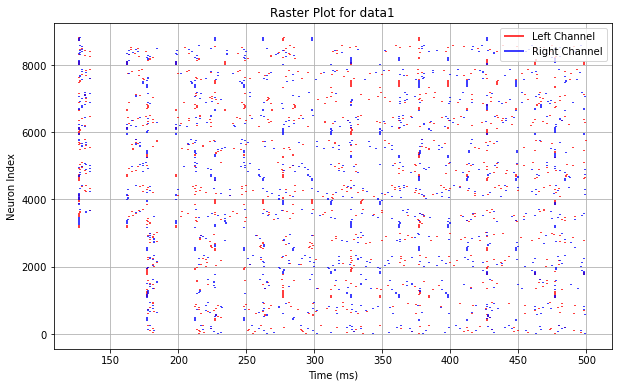

In [21]:
def raster_plot(normalised_3D_matrix, data):
    """
    Plot raster plot for spike events split between left and right channels.

    Parameters:
        normalised_3D_matrix (numpy.ndarray): 3D matrix split between left and right channels.
        data_num (int): Identifier for the data set.

    Returns:
        None
    """
    print("Preparing left raster plot...")
    num_neurons = normalised_3D_matrix.shape[0]

    # Plot raster plot for left channel
    plt.figure(figsize=(10, 6))
    for neuron_idx in range(num_neurons):
        left_spikes = np.where(normalised_3D_matrix[neuron_idx, :, 0])[0]
        plt.vlines(left_spikes, neuron_idx, neuron_idx + 1, color='red',
                   label='Left Channel' if neuron_idx == 0 else None)
    print("Preparing right raster plot...")
    # Plot raster plot for right channel
    for neuron_idx in range(num_neurons):
        right_spikes = np.where(normalised_3D_matrix[neuron_idx, :, 1])[0]
        plt.vlines(right_spikes, neuron_idx, neuron_idx + 1, color='blue',
                   label='Right Channel' if neuron_idx == 0 else None)
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron Index')
    plt.title(f'Raster Plot for {data}')
    plt.legend()
    plt.grid()
    plt.savefig(f"sound_results/{data}_raster_plot.png")
    plt.show()


# Load the data from npy files
data1 = np.load('sound_results/data1.npy')
rate1 = np.load('sound_results/rate1.npy')
senders_left = []
ts_left = []
senders_right = []
ts_right = []
for data_num in ["1"]:
    senders_left.append(np.load(f'sound_results/data{data_num}_left_senders.npy'))
    ts_left.append(np.load(f'sound_results/data{data_num}_left_ts.npy'))
    senders_right.append(np.load(f'sound_results/data{data_num}_right_senders.npy'))
    ts_right.append(np.load(f'sound_results/data{data_num}_right_ts.npy'))

data_shape = [data1.shape]

reconstructed_data1 = np.zeros(data_shape[0])

num_neurons_per_sample = 6
samp_period = 1 / 30
time_step = 60

data1_num_chunks, data1_chunk_size = chunk_data_info(data1, rate1, samp_period)
num_total_neurons = [data1_chunk_size * num_neurons_per_sample]
senders_left[0] = senders_left[0] - 1  # normalisation
senders_right[0] = senders_right[0] - num_total_neurons[0]  # normalisation
print(np.min(senders_left[0]), np.max(senders_left[0]))
print(np.min(senders_right[0]), np.max(senders_right[0]))

datas = ["data1"]

# print(data1_num_total_neurons)
for i in range(len(datas)):
    print(f"++++++++++++++++++ Processing {datas[i]}... +++++++++++++++++++++++")
    num_cols = int(np.max([np.max(ts_left[i]), np.max(ts_right[i])])) + 1
    normalised_3Dmat = create_normalised_3D_matrix(datas[i], ts_left[i], senders_left[i], ts_right[i], senders_right[i],
                                                   num_total_neurons[i], num_cols)
    raster_plot(normalised_3Dmat, datas[i])

# 2D Matrix - Sound Reconstruction 

In [24]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [25]:
def get_idx_for_spike_count(spike_count):
    """
    This function takes a spike count and returns the index if it exists in the current_spikes_values numpy array.
    If the spike count does not exist in the array, it returns -1.

    Parameters:
        spike_count (int): The spike count to search for.

    Returns:
        int: The index if the spike count exists, otherwise -1.
    """
    # Load the current_spikes_values from npy file
    spike_values = np.load('sound_results/current_spikes_values.npy')[:, 1]

    # Iterate through the current_spikes_values array to find the index corresponding to the spike count
    for i in range(0, len(spike_values)):
        if spike_values[i] == spike_count:
            return i
    return -1

    # If the spike count does not exist in the array, return -1
    return -1


In [26]:
def reconstruct_value_from_values(values):
    """
    Reconstructs the value from the given vector of values.

    Parameters:
        currents (numpy.ndarray): Array containing currents for each neuron.

    Returns:
        int: Reconstructed value.
    """

    # Extract the indices of the spike counts corresponding to the given currents
    idx_neuron0 = get_idx_for_spike_count(values[0])
    idx_neuron1 = get_idx_for_spike_count(values[1])
    idx_neuron2 = get_idx_for_spike_count(values[2])
    idx_neuron3 = get_idx_for_spike_count(values[3])
    idx_neuron4 = get_idx_for_spike_count(values[4])
    idx_neuron5 = get_idx_for_spike_count(values[5])

    # Reconstruct the value based on the indices
    value = idx_neuron0 + \
            idx_neuron1 * 10 + \
            idx_neuron2 * 100 + \
            idx_neuron3 * 1000 + \
            idx_neuron4 * 10000

    # Check if the value should be negative
    if idx_neuron5 == 1:
        value *= -1
    return value

In [27]:
def calculate_spike_counts(neuron_matrix):
    """
    Calculate the spike counts for each neuron in a matrix.

    Parameters:
        neuron_matrix (numpy.ndarray): Matrix representing spike events of 6 neurons over 60 ms.

    Returns:
        numpy.ndarray: A vector containing the spike counts for each neuron.
    """
    # Sum along the columns to count spikes for each neuron
    spike_counts = np.sum(neuron_matrix, axis=1)
    return spike_counts


In [28]:
def reconstruct_value(normalised_3Dmat, x, y, data):
    """
    Reconstructs the value from a chunk of 6 neurons and 60 ms of simulation.

    Parameters:
        normalised_3Dmat (numpy.ndarray): 3D matrix containing spike events split between left and right channels.
        x (int): Number of chunks along the time axis.
        y (int): Number of chunks along the neuron axis.

    Returns:
        numpy.ndarray: Reconstructed values for each chunk.
    """
    simulation_ts = 60  # ms
    number_neurons_sample = 6
    reconstructed_vector = np.zeros((x, y, 2))

    # Extract the chunk of spike events for the given chunk index
    idx = 0
    for ts in tqdm(range(0, normalised_3Dmat.shape[1], simulation_ts), desc="Processing simualtion time-steps"):
        for neuron in range(0, normalised_3Dmat.shape[0], number_neurons_sample):
            chunk_left = normalised_3Dmat[neuron:neuron + number_neurons_sample, ts:ts + simulation_ts, 0]
            spike_counts_left = np.sum(chunk_left, axis=1)
            reconstructed_value_left = reconstruct_value_from_values(spike_counts_left)

            chunk_right = normalised_3Dmat[neuron:neuron + number_neurons_sample, ts:ts + simulation_ts, 1]
            spike_counts_right = np.sum(chunk_right, axis=1)
            reconstructed_value_right = reconstruct_value_from_values(spike_counts_right)

            reconstructed_vector[idx, 0] = reconstructed_value_left
            reconstructed_vector[idx, 1] = reconstructed_value_right
            idx += 1
    reconstructed_vector.dump(f"sound_results/reconstructed_{data}.npy")
    return reconstructed_vector


Processing simualtion time-steps: 100%|███████████| 9/9 [00:20<00:00,  2.24s/it]


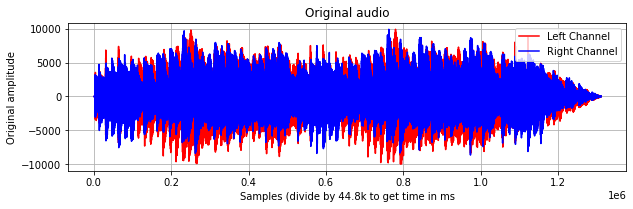

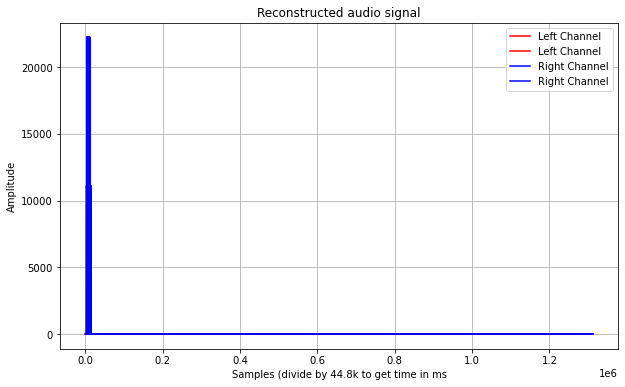

In [31]:
def plot_reconstructed_vector(reconstructed_data, original_data, data_name):
    """
    Plot the reconstructed vector.

    Parameters:
        reconstructed_vector (numpy.ndarray): Reconstructed values for each chunk.
        data_num (int): Identifier for the data set.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(original_data[:, 0], label='Left Channel', color='red')
    plt.plot(original_data[:, 1], label='Right Channel', color='blue')
    plt.xlabel('Samples (divide by 44.8k to get time in ms')
    plt.ylabel('Original amplitude')
    plt.title(f'Original {data_name}')
    plt.legend()
    plt.grid()

 
    plt.figure(figsize=(10, 6))
    plt.plot(reconstructed_data[:, 0], label='Left Channel', color='red')
    plt.plot(reconstructed_data[:, 1], label='Right Channel', color='blue')
    plt.xlabel('Samples (divide by 44.8k to get time in ms')
    plt.ylabel('Amplitude')
    plt.title(f'Reconstructed {data_name} signal')
    plt.legend()
    plt.grid()
    plt.savefig(f"sound_results/reconstructed_{data_name}.png")
    plt.show()


data_names = ["audio"]
original_signals = [np.load('sound_results/data1.npy')]
original_rates = [np.load('sound_results/rate1.npy')]
normalised_3Dmats = [np.load("sound_results/normalised_3Dmat_data1.npy", allow_pickle=True)]

for i in range(len(data_names)):
    reconstructed_matrix = reconstruct_value(normalised_3Dmats[i], original_signals[i].shape[0],
                                             original_signals[i].shape[1], data_names[i])
    plot_reconstructed_vector(reconstructed_matrix, original_signals[i], data_names[i])

# Phase 2 

# Custom SNN Architecture

# SNN - Without Noise 

To show the effects of spike patterns when passing from one layer to another without any disruptions and observe the spike patterns similarity without interuptions

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import nest

In [34]:
def raster_plot(senders_layer1, ts_layer1, senders_layer2, ts_layer2, senders_layer3, ts_layer3,
                senders_noise_layer, ts_noise_layer, senders_lateral_ih_layer, ts_lateral_ih_layer):
    plt.figure(figsize=(10, 8))

    # Layer 1
    plt.subplot(3, 2, 1)
    plt.title('Spike Raster Plot - Layer 1')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.grid()
    for sender, spike_time in zip(senders_layer1, ts_layer1):
        plt.vlines(spike_time, sender, sender + 1, color='red')

    # Layer 2
    plt.subplot(3, 2, 2)
    plt.title('Spike Raster Plot - Layer 2')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.grid()
    for sender, spike_time in zip(senders_layer2, ts_layer2):
        plt.vlines(spike_time, sender, sender + 1, color='blue')

    # Layer 3
    plt.subplot(3, 2, 3)
    plt.title('Spike Raster Plot - Layer 3')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.grid()
    for sender, spike_time in zip(senders_layer3, ts_layer3):
        plt.vlines(spike_time, sender, sender + 1, color='green')

    # Noise Layer
    plt.subplot(3, 2, 4)
    plt.title('Spike Raster Plot - Noise Layer')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.grid()
    for sender, spike_time in zip(senders_noise_layer, ts_noise_layer):
        plt.vlines(spike_time, sender, sender + 1, color='orange')

    # Lateral Ih Layer
    plt.subplot(3, 2, 5)
    plt.title('Spike Raster Plot - Lateral Ih Layer')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.grid()
    for sender, spike_time in zip(senders_lateral_ih_layer, ts_lateral_ih_layer):
        plt.vlines(spike_time, sender, sender + 1, color='violet')

    plt.tight_layout()
    plt.savefig("results/nn_NoNoise_raster_plot.png")
    plt.show()

In [35]:
def simulate_neural_network(num_steps=200, simulation_duration=50.0, min_current=300.0, max_current=450.0):
    # Reset the NEST simulator
    nest.ResetKernel()
    nest.set_verbosity(20)  # Set NEST verbosity level to 20
    nest.SetKernelStatus({'print_time': False})

    # Create the neurons
    nest.SetDefaults("iaf_psc_alpha", {"I_e": 0.0})
    neuron_layer1 = nest.Create("iaf_psc_alpha", 2)
    neuron_layer2 = nest.Create("iaf_psc_alpha", 100)
    neuron_layer3 = nest.Create("iaf_psc_alpha", 100)
    # noise_layer = nest.Create("sinusoidal_gamma_generator", 10)
    lateral_ih_layer = nest.Create("iaf_psc_alpha", 10)

    # nest.SetStatus(noise_layer, {"rate": 10.0})  # Commented out noisy layer

    # Create spike recorders for each layer
    spike_recorder_layer1 = nest.Create("spike_recorder")
    spike_recorder_layer2 = nest.Create("spike_recorder")
    spike_recorder_layer3 = nest.Create("spike_recorder")
    # spike_recorder_noise_layer = nest.Create("spike_recorder")
    spike_recorder_lateral_ih_layer = nest.Create("spike_recorder")

    # Connect the spike recorders to the neurons
    nest.Connect(neuron_layer1, spike_recorder_layer1)
    nest.Connect(neuron_layer2, spike_recorder_layer2)
    nest.Connect(neuron_layer3, spike_recorder_layer3)
    # nest.Connect(noise_layer, spike_recorder_noise_layer)
    nest.Connect(lateral_ih_layer, spike_recorder_lateral_ih_layer)

    # Define connectivity between neurons
    syn_spec_l1l2 = {"weight": 1200.0}
    syn_spec_l2l3 = {"weight": 1200.0}
    # syn_spec_lnl2 = {"weight": 1200.0}

    # Define the connections for neuron 1 of layer 1 to neurons 1, 2, 3 of layer 2
    connections_layer1 = [(neuron_layer1[0], neuron_layer2[i]) for i in range(3)]

    # Define the connections for neuron 2 of layer 1 to neurons 4, 5, 6 of layer 2
    connections_layer2 = [(neuron_layer1[1], neuron_layer2[i]) for i in range(3, 6)]

    # Connect neuron 1 of layer 1 to neurons 1, 2, 3 of layer 2
    for connection in connections_layer1:
        nest.Connect(connection[0], connection[1], syn_spec=syn_spec_l1l2)

    # Connect neuron 2 of layer 1 to neurons 4, 5, 6 of layer 2
    for connection in connections_layer2:
        nest.Connect(connection[0], connection[1], syn_spec=syn_spec_l1l2)

    # Connect layer 2 to layer 3 symmetrically
    for i in range(3):
        nest.Connect(neuron_layer2[i], neuron_layer3[i], syn_spec=syn_spec_l2l3)
        nest.Connect(neuron_layer2[i + 3], neuron_layer3[i + 3], syn_spec=syn_spec_l2l3)

    # Define the connections from noisy neurons to layer 2 neurons
    # connection_mapping = {0: [1, 4], 1: [2, 5]}  # Commented out noisy layer

    # Connect the noisy neurons to specific neurons in layer 2
    # for noise_neuron, target_neurons in connection_mapping.items():  # Commented out noisy layer
    #     for target_neuron in target_neurons:  # Commented out noisy layer
    #         nest.Connect(noise_layer[noise_neuron], neuron_layer2[target_neuron], syn_spec=syn_spec_lnl2)  # Commented out noisy layer

    for step in range(num_steps):
        print(f"Step {step + 1}/{num_steps}")

        # Generate random currents for neurons 1 and 2 in layer 1
        random_currents = np.random.uniform(min_current, max_current, size=2)

        # Apply the random currents to neurons in layer 1
        for i, current in enumerate(random_currents):
            nest.SetStatus(neuron_layer1[i], {"I_e": current})

        # Simulate the network for 50 ms
        nest.Simulate(simulation_duration)

    # Retrieve spike times from spike recorders
    events_layer1 = nest.GetStatus(spike_recorder_layer1, "events")[0]
    events_layer2 = nest.GetStatus(spike_recorder_layer2, "events")[0]
    events_layer3 = nest.GetStatus(spike_recorder_layer3, "events")[0]
    # events_noise_layer = nest.GetStatus(spike_recorder_noise_layer, "events")[0]  # Commented out noisy layer
    events_lateral_ih_layer = nest.GetStatus(spike_recorder_lateral_ih_layer, "events")[0]

    # Extract senders and spike times
    senders_layer1 = events_layer1["senders"]
    ts_layer1 = events_layer1["times"]

    senders_layer2 = events_layer2["senders"]
    ts_layer2 = events_layer2["times"]

    senders_layer3 = events_layer3["senders"]
    ts_layer3 = events_layer3["times"]

    # senders_noise_layer = events_noise_layer["senders"]  # Commented out noisy layer
    # ts_noise_layer = events_noise_layer["times"]  # Commented out noisy layer

    senders_lateral_ih_layer = events_lateral_ih_layer["senders"]
    ts_lateral_ih_layer = events_lateral_ih_layer["times"]

    # Call the function with the senders and ts
    raster_plot(senders_layer1, ts_layer1, senders_layer2, ts_layer2, senders_layer3, ts_layer3,
                [], [], senders_lateral_ih_layer, ts_lateral_ih_layer)  # Pass empty lists for noisy layer


Step 1/200
Step 2/200
Step 3/200
Step 4/200
Step 5/200
Step 6/200
Step 7/200
Step 8/200
Step 9/200
Step 10/200
Step 11/200
Step 12/200
Step 13/200
Step 14/200
Step 15/200
Step 16/200
Step 17/200
Step 18/200
Step 19/200
Step 20/200
Step 21/200
Step 22/200
Step 23/200
Step 24/200
Step 25/200
Step 26/200
Step 27/200
Step 28/200
Step 29/200
Step 30/200
Step 31/200
Step 32/200
Step 33/200
Step 34/200
Step 35/200
Step 36/200
Step 37/200
Step 38/200
Step 39/200
Step 40/200
Step 41/200
Step 42/200
Step 43/200
Step 44/200
Step 45/200
Step 46/200
Step 47/200
Step 48/200
Step 49/200
Step 50/200
Step 51/200
Step 52/200
Step 53/200
Step 54/200
Step 55/200
Step 56/200
Step 57/200
Step 58/200
Step 59/200
Step 60/200
Step 61/200
Step 62/200
Step 63/200
Step 64/200
Step 65/200
Step 66/200
Step 67/200
Step 68/200
Step 69/200
Step 70/200
Step 71/200
Step 72/200
Step 73/200
Step 74/200
Step 75/200
Step 76/200
Step 77/200
Step 78/200
Step 79/200
Step 80/200
Step 81/200
Step 82/200
Step 83/200
Step 84/200
S

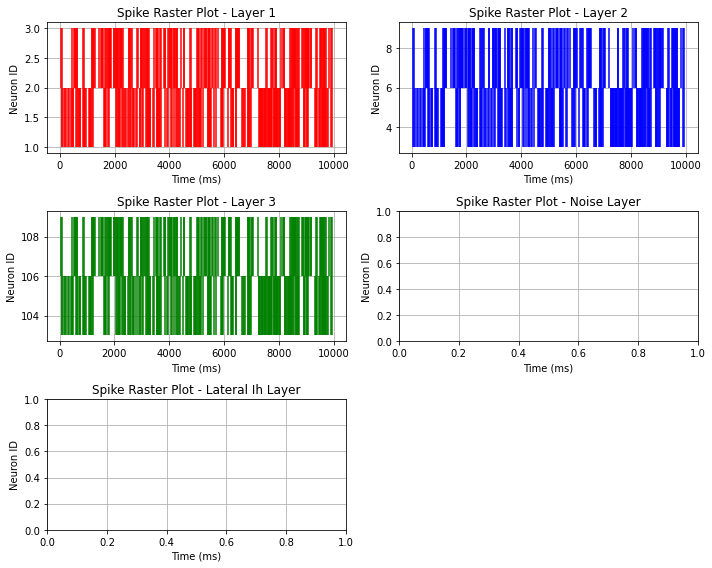

In [36]:
simulate_neural_network(num_steps=200, simulation_duration=50.0, min_current=300.0, max_current=450.0)

# SNN - With Noise,  STDP and Teaching Layer

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import nest

In [39]:
def raster_plot(senders_layer1, ts_layer1, senders_layer2, ts_layer2, senders_layer3, ts_layer3,
                senders_noise_layer, ts_noise_layer, senders_lateral_ih_layer, ts_lateral_ih_layer, senders_teaching,
                ts_teaching, weights, save_path=None):
    plt.figure(figsize=(10, 8))

    # Layer 1
    plt.subplot(3, 2, 1)
    plt.title('Spike Raster Plot - Layer 1')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.grid()
    for sender, spike_time in zip(senders_layer1, ts_layer1):
        plt.vlines(spike_time, sender, sender + 1, color='red')

    # Layer 2
    plt.subplot(3, 2, 2)
    plt.title('Spike Raster Plot - Layer 2')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.grid()
    for sender, spike_time in zip(senders_layer2, ts_layer2):
        plt.vlines(spike_time, sender, sender + 1, color='blue')

    # Layer 3
    plt.subplot(3, 2, 3)
    plt.title('Spike Raster Plot - Layer 3')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.grid()
    for sender, spike_time in zip(senders_layer3, ts_layer3):
        plt.vlines(spike_time, sender, sender + 1, color='green')

    # Noise Layer
    plt.subplot(3, 2, 4)
    plt.title('Spike Raster Plot - Noise Layer')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.grid()
    for sender, spike_time in zip(senders_noise_layer, ts_noise_layer):
        plt.vlines(spike_time, sender, sender + 1, color='orange')

    # Teaching Layer
    plt.subplot(3, 2, 5)
    plt.title('Spike Raster Plot - Teaching Layer')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.grid()
    for sender, spike_time in zip(senders_teaching, ts_teaching):
        plt.vlines(spike_time, sender, sender + 1, color='pink')

    plt.subplot(3, 2, 6)
    plt.plot(weights, label='Layer 2 -> Layer 3', color='red')
    plt.xlabel('Simulation Step [1 step = 50 ms]')
    plt.ylabel('Synaptic Weight')
    plt.title('STDP Synaptic Weight Evolution')
    plt.grid()

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

Step 1/120
Step 2/120
Step 3/120
Step 4/120
Step 5/120
Step 6/120
Step 7/120
Step 8/120
Step 9/120
Step 10/120
Step 11/120
Step 12/120
Step 13/120
Step 14/120
Step 15/120
Step 16/120
Step 17/120
Step 18/120
Step 19/120
Step 20/120
Step 21/120
Step 22/120
Step 23/120
Step 24/120
Step 25/120
Step 26/120
Step 27/120
Step 28/120
Step 29/120
Step 30/120
Step 31/120
Step 32/120
Step 33/120
Step 34/120
Step 35/120
Step 36/120
Step 37/120
Step 38/120
Step 39/120
Step 40/120
Step 41/120
Step 42/120
Step 43/120
Step 44/120
Step 45/120
Step 46/120
Step 47/120
Step 48/120
Step 49/120
Step 50/120
Step 51/120
Step 52/120
Step 53/120
Step 54/120
Step 55/120
Step 56/120
Step 57/120
Step 58/120
Step 59/120
Step 60/120
Step 61/120
Step 62/120
Step 63/120
Step 64/120
Step 65/120
Step 66/120
Step 67/120
Step 68/120
Step 69/120
Step 70/120
Step 71/120
Step 72/120
Step 73/120
Step 74/120
Step 75/120
Step 76/120
Step 77/120
Step 78/120
Step 79/120
Step 80/120
Step 81/120
Step 82/120
Step 83/120
Step 84/120
S

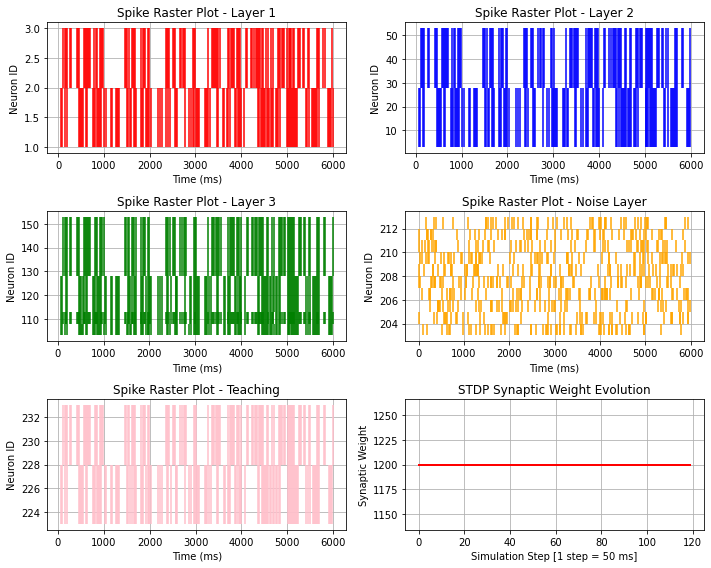

In [40]:
def simulate_neural_network(num_steps=20, simulation_duration=50.0, min_current=300.0, max_current=450.0, save_path=None):
    # Reset the NEST simulator
    nest.ResetKernel()
    nest.set_verbosity(20)  # Set NEST verbosity level to 20
    nest.SetKernelStatus({'print_time': False})

    # Create the neurons
    nest.SetDefaults("iaf_psc_alpha", {"I_e": 0.0})
    neuron_layer1 = nest.Create("iaf_psc_alpha", 2)
    neuron_layer2 = nest.Create("iaf_psc_alpha", 100)
    neuron_layer3 = nest.Create("iaf_psc_alpha", 100)
    noise_layer = nest.Create("poisson_generator", 10)
    lateral_ih_layer = nest.Create("iaf_psc_alpha", 10)
    teaching_layer = nest.Create('iaf_psc_alpha', 50)

    nest.SetStatus(noise_layer, {"rate": 10.0})  # Set the firing rate of the noisy neurons

    # Create spike recorders for each layer
    spike_recorder_layer1 = nest.Create("spike_recorder")
    spike_recorder_layer2 = nest.Create("spike_recorder")
    spike_recorder_layer3 = nest.Create("spike_recorder")
    spike_recorder_noise_layer = nest.Create("spike_recorder")
    spike_recorder_lateral_ih_layer = nest.Create("spike_recorder")
    spike_recorder_teach = nest.Create('spike_recorder')

    # Connect the spike recorders to the neurons
    nest.Connect(neuron_layer1, spike_recorder_layer1)
    nest.Connect(neuron_layer2, spike_recorder_layer2)
    nest.Connect(neuron_layer3, spike_recorder_layer3)
    nest.Connect(noise_layer, spike_recorder_noise_layer)
    nest.Connect(lateral_ih_layer, spike_recorder_lateral_ih_layer)
    nest.Connect(teaching_layer, spike_recorder_teach)

    # Define connectivity between neurons
    syn_spec_l1l2 = {"weight": 1200.0}
    syn_spec_l1l3 = {"weight": 1200.0}
    syn_spec_l2l3 = {"weight": 1200.0}
    syn_spec_lnl2 = {"weight": 1200.0}
    syn_spec_l2ih = {"weight": 1200.0}
    syn_spec_ihl2 = {"weight": -600.0}
    syn_spec_l1lih = {"weight": -1200.0}

    for i in range(50):
        nest.Connect(teaching_layer[i], neuron_layer3[i], 'one_to_one', syn_spec={'weight': 1200})

    for i in range(5):
        nest.Connect(neuron_layer1[0], teaching_layer[i], 'one_to_one', syn_spec={'weight': 1200, 'synapse_model': 'static_synapse'})

    for i in range(5):
        nest.Connect(neuron_layer1[1], teaching_layer[i+5], 'one_to_one', syn_spec={'weight': 1200, 'synapse_model': 'static_synapse'})

    for i in range(25):
        nest.Connect(neuron_layer1[0], neuron_layer2[i], 'one_to_one', syn_spec={'weight': 1200})

    for i in range(25, 50):
        nest.Connect(neuron_layer1[1], neuron_layer2[i], 'one_to_one', syn_spec={'weight': 1200})

    nest.Connect(neuron_layer2, neuron_layer3, 'one_to_one', syn_spec={'weight': 1200, 'synapse_model': 'static_synapse'})

    for i in range(10):
        nest.Connect(noise_layer[i], neuron_layer2[i])

    stdp_synapse_weights_l2l3 = []
    for step in range(num_steps):
        print(f"Step {step + 1}/{num_steps}")

        # Generate random currents for neurons 1 and 2 in layer 1
        random_currents = np.random.uniform(min_current, max_current, size=2)

        # Apply the random currents to neurons in layer 1
        for i, current in enumerate(random_currents):
            nest.SetStatus(neuron_layer1[i], {"I_e": current})

        # Simulate the network for 50 ms
        nest.Simulate(simulation_duration)
        stdp_synapse_weights_l2l3.append(nest.GetStatus(nest.GetConnections(neuron_layer2, neuron_layer3), "weight"))

    # Retrieve spike times from spike recorders
    events_layer1 = nest.GetStatus(spike_recorder_layer1, "events")[0]
    events_layer2 = nest.GetStatus(spike_recorder_layer2, "events")[0]
    events_layer3 = nest.GetStatus(spike_recorder_layer3, "events")[0]
    events_noise_layer = nest.GetStatus(spike_recorder_noise_layer, "events")[0]
    events_lateral_ih_layer = nest.GetStatus(spike_recorder_lateral_ih_layer, "events")[0]
    events_teach = nest.GetStatus(spike_recorder_teach, "events")[0]

    # Extract senders and spike times
    senders_layer1 = events_layer1["senders"]
    ts_layer1 = events_layer1["times"]

    senders_layer2 = events_layer2["senders"]
    ts_layer2 = events_layer2["times"]

    senders_layer3 = events_layer3["senders"]
    ts_layer3 = events_layer3["times"]

    senders_noise_layer = events_noise_layer["senders"]
    ts_noise_layer = events_noise_layer["times"]

    senders_lateral_ih_layer = events_lateral_ih_layer["senders"]
    ts_lateral_ih_layer = events_lateral_ih_layer["times"]

    senders_teaching = events_teach["senders"]
    ts_teaching = events_teach["times"]

    # Call the function with the senders and ts
    raster_plot(senders_layer1, ts_layer1, senders_layer2, ts_layer2, senders_layer3, ts_layer3,
                senders_noise_layer, ts_noise_layer, senders_lateral_ih_layer, ts_lateral_ih_layer, senders_teaching,
                ts_teaching, stdp_synapse_weights_l2l3, save_path)

# Simulate the neural network with intercalated training and testing
simulate_neural_network(num_steps=120, simulation_duration=50.0, min_current=300, max_current=450, save_path="results/intercalated_training_and_testing.png")


## MP4 Storage for Reconstructed Video:  
The reconstructed video after training must be saved in an MP4 file

In [3]:
import os
import cv2

# Path to the folder containing reconstructed frames
input_folder = "reconstructed_images"

# Path to the folder where the reconstructed video will be saved
output_folder = "Reconstructed_Output"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get the list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]

# Sort the image files by their names
image_files.sort()

# Initialize an empty list to store the images
images = []

# Read each image file and append it to the list of images
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    images.append(image)

# Get the dimensions of the images
height, width, _ = images[0].shape

# Define the codec and create a VideoWriter object
codec = 'mp4v'  # You can change the codec as needed, e.g., 'XVID' for AVI format
output_video_path = os.path.join(output_folder, 'reconstructed_video.mp4')
fps = 25.0  # Frames per second
resolution = (width, height)  # Resolution of the video

# Additional parameters to specify the video format and resolution
fourcc = cv2.VideoWriter_fourcc(*codec)
out = cv2.VideoWriter(output_video_path, fourcc, fps, resolution)

# Write each image to the video writer
for image in images:
    out.write(image)

# Release the video writer
out.release()

# Print resolution and format
print("Reconstructed video saved at:", output_video_path)
print("Resolution:", resolution)
print("Format:", codec)


Reconstructed video saved at: Reconstructed_Output/reconstructed_video.mp4
Resolution: (200, 174)
Format: mp4v


# Phase 1 Analysis 

Phase 1 of the assessment encompassed splitting a video into individual frames and sound, Image and Sound encoding, Image and sound decoding and reconstruction of a final video. After resizing the images and converting pixel intensities to currents, the SNN, comprised of three layers for each color channel using the Leaky integrate-and-fire neuron model with alpha-shaped input currents, is simulated. Raster plots are generated to visualize neuron spiking activity over time for each color channel. These results offered insights into how the SNN processes visual information from the images, aiding in the understanding of neural computation and informing the development of image processing tasks. Throughout the process, the SNN generates spike events, which are meticulously processed to construct a normalized 2D matrix representing spike occurrences across neurons and time bins. Leveraging this matrix, the code proceeds to reconstruct images through a reverse mapping procedure, assigning analog values to pixels based on the reconstructed spike events. Subsequent visual comparisons between the original and reconstructed images, along with the calculation and visualization of the absolute difference between them, allow for a comprehensive assessment of the reconstruction accuracy and fidelity. The results,though distored and suboptimal  also offer comprehensive insight into the SNN's ability to analyse multiple frames and gain insight/patterns and represent visual information. Thus shedding light on the SNN's ability for visual information processing. Using mdoels such as the leaky intergrate and fire alpha model as well as utilising 3D and 2D natrices to reconstruct the frames plays on the effectiveness of the various tools used in SNN. 

# Phase 2 Analysis 

Phase 2 consists of a small custom SNN design to explore the effects of noise as well as various methods and functions to mitigate that noise in the network and observe the behaviour of the neurons and spike patterns. Results obtained showed the effects of methods such as the addition of lateral inhibition layer and the addition of the teahcing layer respectively. I observed that the lateral inhibition layer effectively mitigated the noise that was injected into layer 2 far better than when trying to mitigate noise using teaching layer. STDP was also used to find the optimal weights to be used within the network. 

## Conclusions and Future work
Draw the final conclusions and discuss the future work

My final conclusion on the SNN project plays on the theorectical effectiveness of SNN and what it can do and its many applications. Its ability and effectiveness to convert data into spike patterns, extract and analyse meaningful patterns from said patterns and more i beleieve have great potential on real world applications beyond computer vision. SNN could introduce a new world of bio inspired computing, further bridging the gap between computers and humans. I believe that given more time, resources and research I could have explored far more and been able to try various models, functions and methods. I plan to continue this project by testing out combinations that i did not have time to execute. This inlcudes experimenting with various noise generators, in particular the sinusoidal_poisson_generator and the type of noise it may generate and how it could affect the network and then attempting to mitigate that noise with a combination of lateral inhibition and teaching. I also plan to explore the use of STDP synapses in the first and second layers simultaneously to visaulize effectiveness. There is alot more to explore in this field with just noise alone and its effects on spike patterns and more that i hope to explore. 

## Discuss the AI ethics
Discuss the AI ethics implications in terms of security, protection, accountability, and algorithmic bias.

Human - centred design. The model exhibits the need for human involvement and participation and supports the use in human nature as it is developed to compliment its users rather than replace or make obsolete leading to more Bio inspired algorithms. 